For this project on attempting to calculate the dissolved inorganic nitrogen concentrations (DIN) in the Lafayette River, I am using a combination of my own data, collected over the span of 2016-2019, as well as data from outside sources run and maintained by NOAA. Data from YSI's, including chlorophyll, salinity, temperature, dissolved oxygen, turbidity, pH, and depth, are collected by the Mulholland lab using YSI 6600 series YSI's for both profiles and moorings. Nitrogen samples are also collected by the Mulholland lab at depths determined after viewing a YSI profile. Samples are run on a nutrient auto-analyzer. All samples from the Mulholland lab are collected in the Lafayette River at the Norfolk Yacht and Coutry Club (NYCC).

Tidal data is collected from NOAA Tides and Currents from the Sewells Point, VA tidal station (https://tidesandcurrents.noaa.gov/stationhome.html?id=8638610). The tidal data is collected every six minutes, but has been averaged to hourly for the purpose of matching tides with the 14:00 sampling time at NYCC. This station is approximately 5.7 km from NYCC and therefore the tidal data should be very accurate. Water level is reported in meters above or below average sea level.

Wind and precipitation data was collected from NOAA National Centers for Environmental Information (https://www.ncdc.noaa.gov/cdo-web/datasets/LCD/stations/WBAN:13737/detail) at a station located at Norfolk International Airport (ORF). The wind data collected from this site is collected multiple times a minute and was averaged to daily for the purpose of this project. The precipitaiton is reported hourly, but is also averaged to daily for this project. This location is approximately 9.5 km from NYCC, also making the data gathered from this site to be representative of NYCC wind and precipitation. Wind speed is collected in mph and is converted to m/s for this project. Wind direction is reported in degrees from 0 to 360. Precipitation data is collected in 1/8" and is converted to meters for this project.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt # v. 3.1.1
import numpy as np # v. 1.16.2
import pandas as pd # v. 0.24.2

In [2]:
# Reading in the .csv file with all data.
infile = 'Combined_List_R_UPDATED_HEADERS.csv'

#Creating the data variable.
data = pd.read_csv(infile, sep = (','))

# Let's take a quick look at the data.
data

,Date,Month,Day,Year,Depth_ID,Depth,Time,NH4,Urea,DIN,...,pH,Chl,Turb,DO,Tide,Precipitation,Wind_Speed,Wind_Dir,Bloom,Unnamed: 22
0,6/6/2016,6,6,2016,1,0.50,14:00,0.46,0.08000,0.557,...,NaN,15.20000,9.3,7.47,0.509,0.003333,9.291667,233.043478,1,NaN
1,6/6/2016,6,6,2016,3,5.00,14:00,2.05,0.08000,0.346,...,NaN,10.90000,4.7,6.62,0.509,0.003333,9.291667,233.043478,1,NaN
2,6/7/2016,6,7,2016,1,0.50,14:00,0.36,0.08000,0.275,...,7.54,27.30000,8.6,9.32,0.359,0.022500,6.741935,178.928571,1,NaN
3,6/7/2016,6,7,2016,3,5.50,14:00,2.45,0.10441,1.506,...,7.11,11.80000,18.8,6.93,0.359,0.022500,6.741935,178.928571,1,NaN
4,6/8/2016,6,8,2016,1,0.50,14:00,0.08,0.08000,0.214,...,7.82,14.40000,12.4,7.75,0.280,0.000000,11.000000,303.333333,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,10/1/2019,10,1,2019,2,3.00,14:00,NaN,0.08000,4.870,...,NaN,6.87246,4.5,6.14,0.727,0.000000,3.520000,85.000000,0,NaN
926,10/1/2019,10,1,2019,3,5.75,14:00,NaN,0.08000,4.870,...,NaN,5.88841,6.9,5.88,0.727,0.000000,3.520000,85.000000,0,NaN
927,10/1/2019,10,1,2019,1,0.25,14:00,NaN,0.11000,1.660,...,NaN,27.93113,9.5,7.31,0.727,0.000000,3.520000,85.000000,0,NaN
928,10/1/2019,10,1,2019,2,0.75,14:00,NaN,0.16000,1.700,...,NaN,25.76622,9.5,7.19,0.727,0.000000,3.520000,85.000000,0,NaN


F:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:391: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
F:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:392: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
F:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
F:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


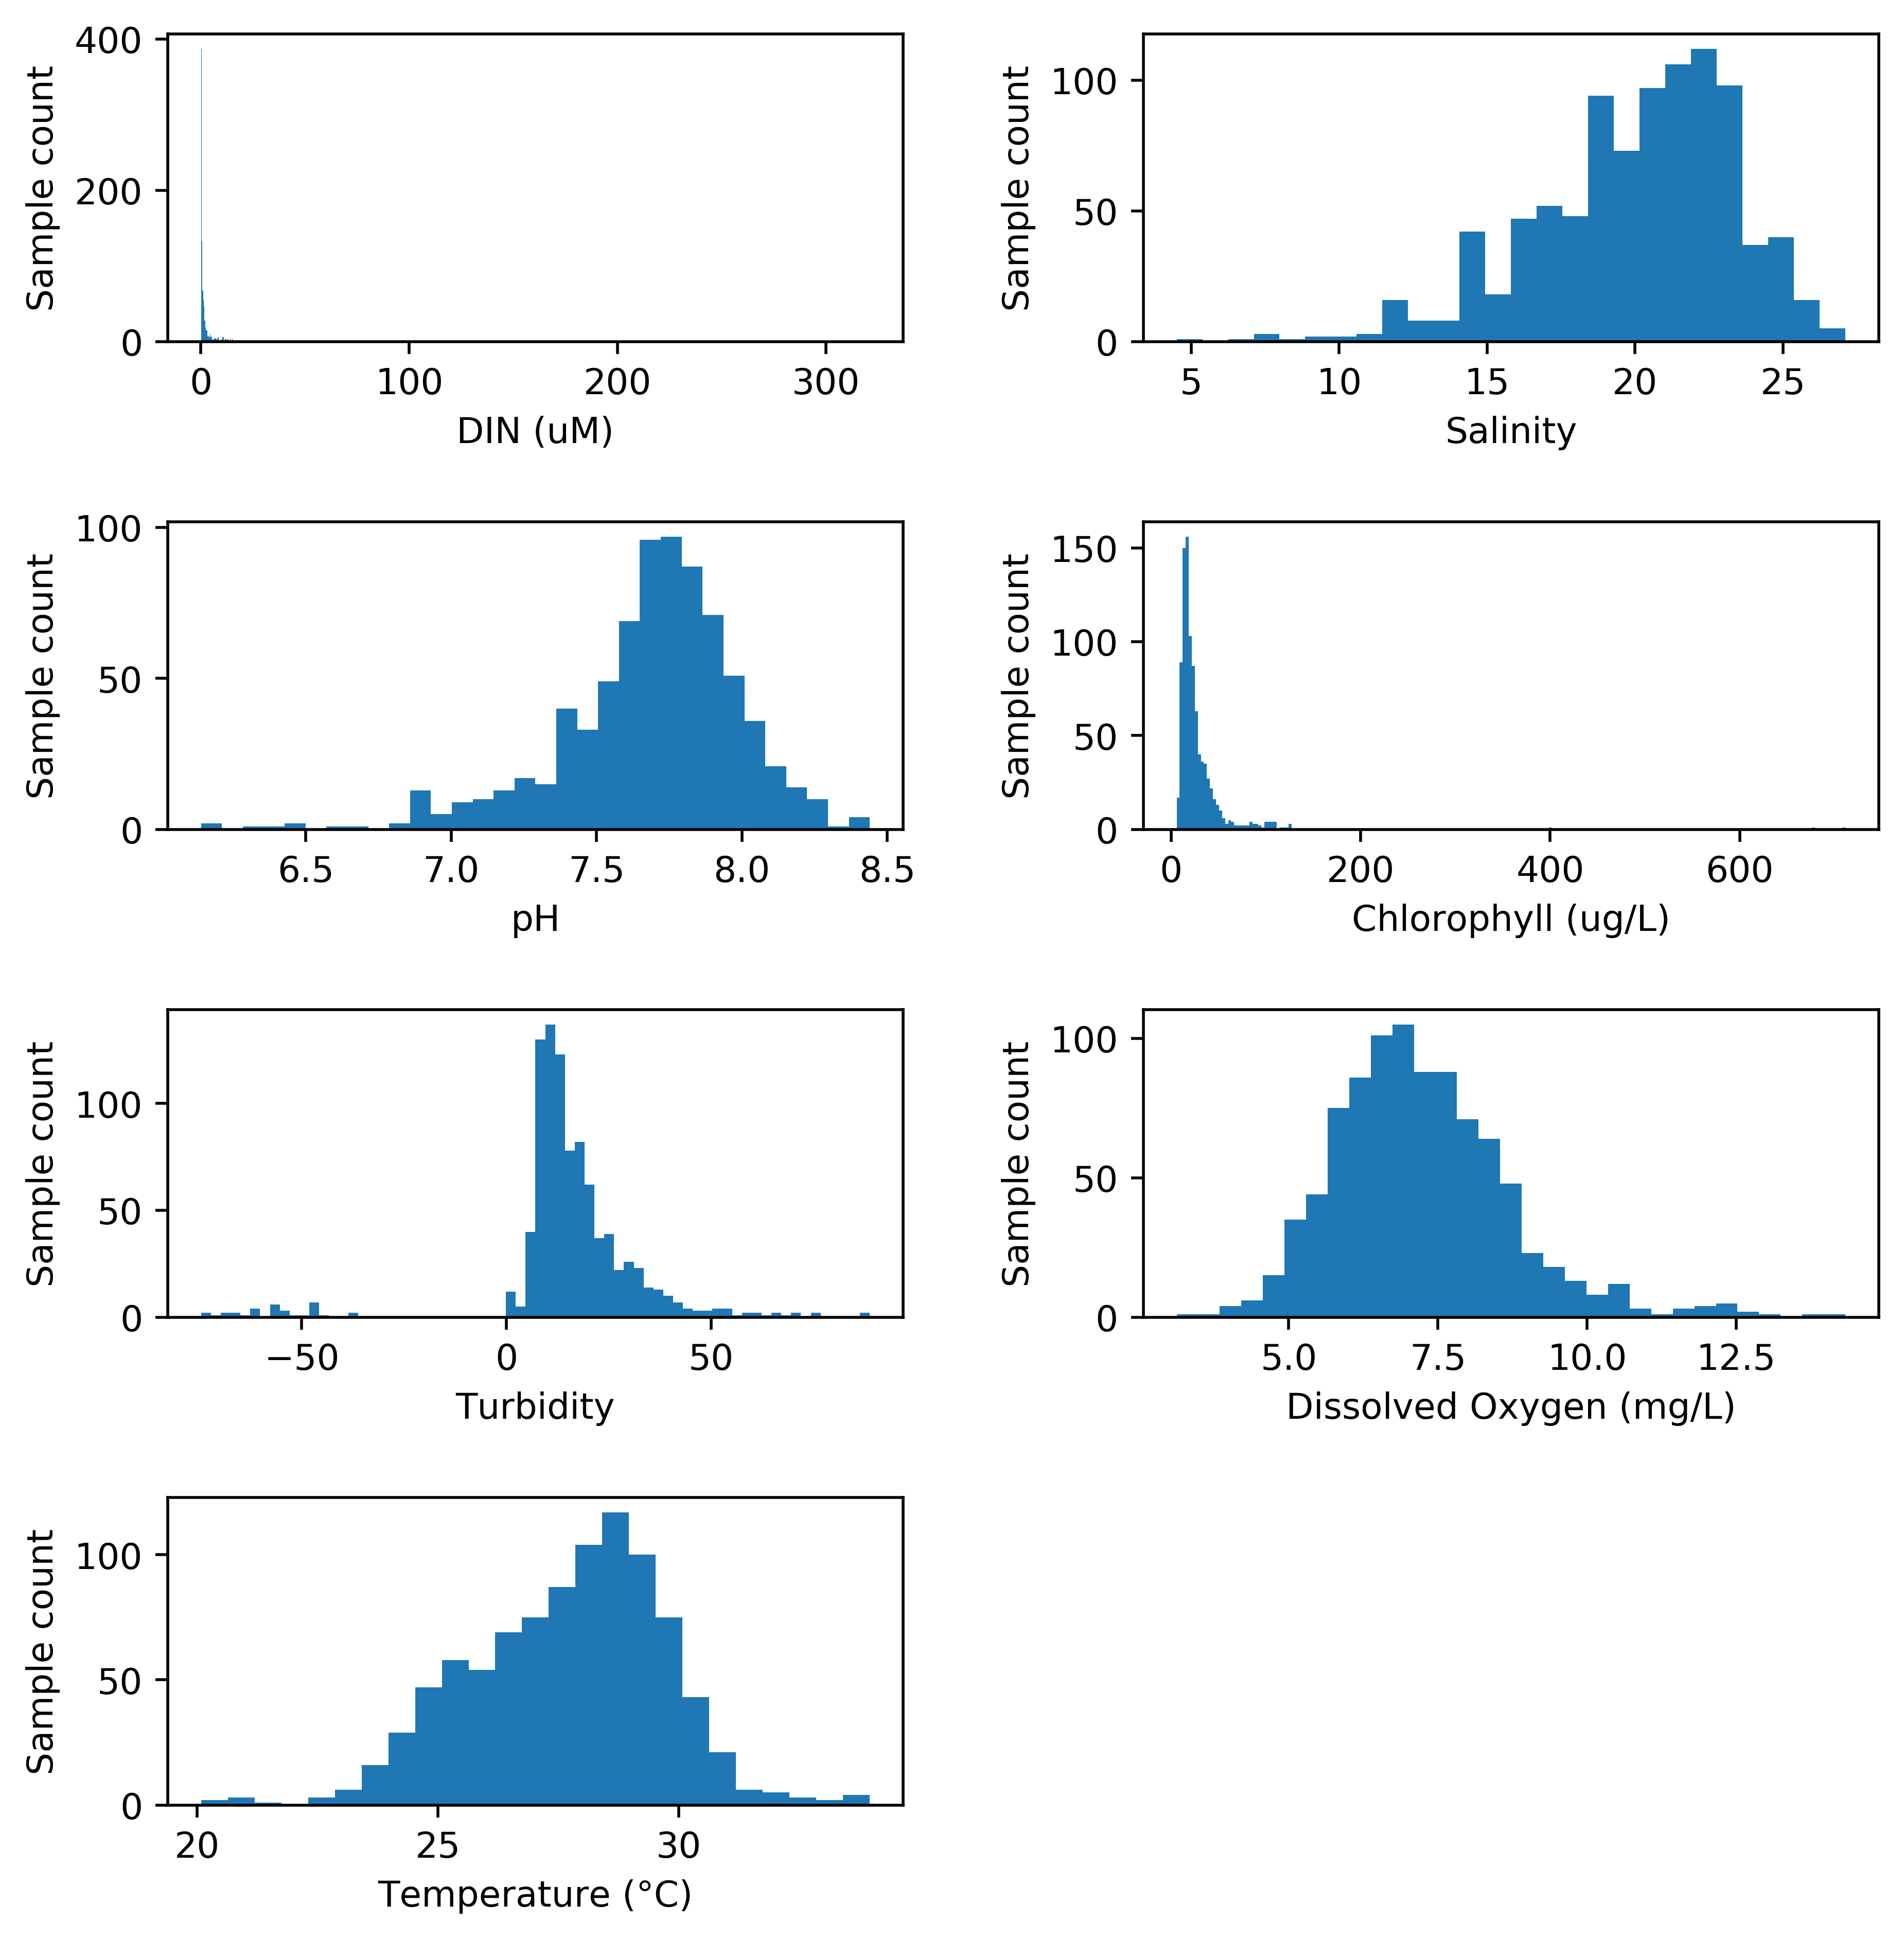

In [3]:
#Check to see where the variable data points lie. Some may be below zero or very high
fig, axs = plt.subplots(4, 2, figsize = (8, 8), dpi = 500)
fig.tight_layout(pad=3.0) #This increases the spacing between subplots!

axs[0, 0].hist(data.DIN, bins='auto') #DIN
axs[0, 0].set_xlabel('DIN (uM)')
axs[0, 0].set_ylabel('Sample count')
#axs[0, 0].set_ylim(0, 200)

axs[0, 1].hist(data.Sal, bins='auto') #Salinity
axs[0, 1].set_xlabel('Salinity')
axs[0, 1].set_ylabel('Sample count')

axs[1, 0].hist(data.pH, bins='auto') #pH 
axs[1, 0].set_xlabel('pH')
axs[1, 0].set_ylabel('Sample count')

axs[1, 1].hist(data.Chl, bins='auto') #Chlorophyll
axs[1, 1].set_xlabel('Chlorophyll (ug/L)')
axs[1, 1].set_ylabel('Sample count')

axs[2, 0].hist(data.Turb, bins='auto') #Turbidity
axs[2, 0].set_xlabel('Turbidity')
axs[2, 0].set_ylabel('Sample count')

axs[2, 1].hist(data.DO, bins='auto') #Dissolved Oxygen
axs[2, 1].set_xlabel('Dissolved Oxygen (mg/L)')
axs[2, 1].set_ylabel('Sample count')

axs[3, 0].hist(data.Temp, bins='auto') #Temperature
axs[3, 0].set_xlabel('Temperature (\N{DEGREE SIGN}C)')
axs[3, 0].set_ylabel('Sample count')

fig.delaxes(axs[3,1]) # remove empty subplot

I chose to use histograms to easily visualize the distribution of each data variable. This data is uncorrected, therefore this makes it easy to see where the bad data points lie and in which variables they lie. In the first hitogram, there are many DIN samples close to 0 (nearing 400). This appears to distort/minimize the appearance of the rest of the data. DIN also reaches concentrations near 300 uM, values that are far to high to be true. Salinity, pH, dissolved oxygen, and temperature all follow a parabolic shape, while turbidity, chlorophyll, and DIN (although difficult to see) follow a negative exponential shape.

In [4]:
data.describe()

,Month,Day,Year,Depth_ID,Depth,Urea,DIN,PO4,Temp,Sal,pH,Chl,Turb,DO,Tide,Precipitation,Wind_Speed,Wind_Dir,Bloom
count,930.000000,930.000000,930.000000,930.000000,930.000000,908.000000,929.000000,929.000000,930.000000,930.000000,771.000000,930.000000,926.000000,927.000000,930.000000,930.000000,930.000000,930.000000,930.000000
mean,7.416129,15.277419,2017.639785,1.993548,2.269355,0.136437,3.094700,2.279135,27.684155,20.006839,7.685525,28.342113,15.081749,7.233258,0.225199,0.013151,7.564187,160.495572,0.506452
std,1.076192,8.516964,1.184002,0.816910,1.859547,0.196375,13.936814,1.584062,2.015112,3.398665,0.312475,38.588654,17.963337,1.470912,0.278962,0.039408,2.475832,61.969269,0.500227
min,5.000000,1.000000,2016.000000,1.000000,0.000000,0.031950,0.070000,0.030000,20.080000,4.510000,6.140000,5.883750,-74.600000,3.120000,-0.352000,0.000000,3.200000,34.583333,0.000000
25%,7.000000,8.000000,2016.000000,1.000000,0.500000,0.080000,0.230000,1.020000,26.280000,18.130000,7.540000,15.052713,9.625000,6.265000,-0.013250,0.000000,5.884615,108.260870,0.000000
50%,7.000000,15.000000,2018.000000,2.000000,1.750000,0.080000,0.565000,2.120000,27.930000,20.570000,7.730000,20.233370,13.900000,7.060000,0.244000,0.000000,7.291667,169.600000,1.000000
75%,8.000000,22.000000,2019.000000,3.000000,3.750000,0.100000,1.840000,3.260000,29.097500,22.472500,7.880000,30.656840,21.375000,8.045000,0.424000,0.003646,8.851852,213.636364,1.000000
max,10.000000,31.000000,2019.000000,3.000000,6.000000,2.414990,321.070000,12.200000,33.973704,27.110000,8.440000,711.500000,88.700000,14.330000,1.165000,0.405161,17.064516,303.333333,1.000000


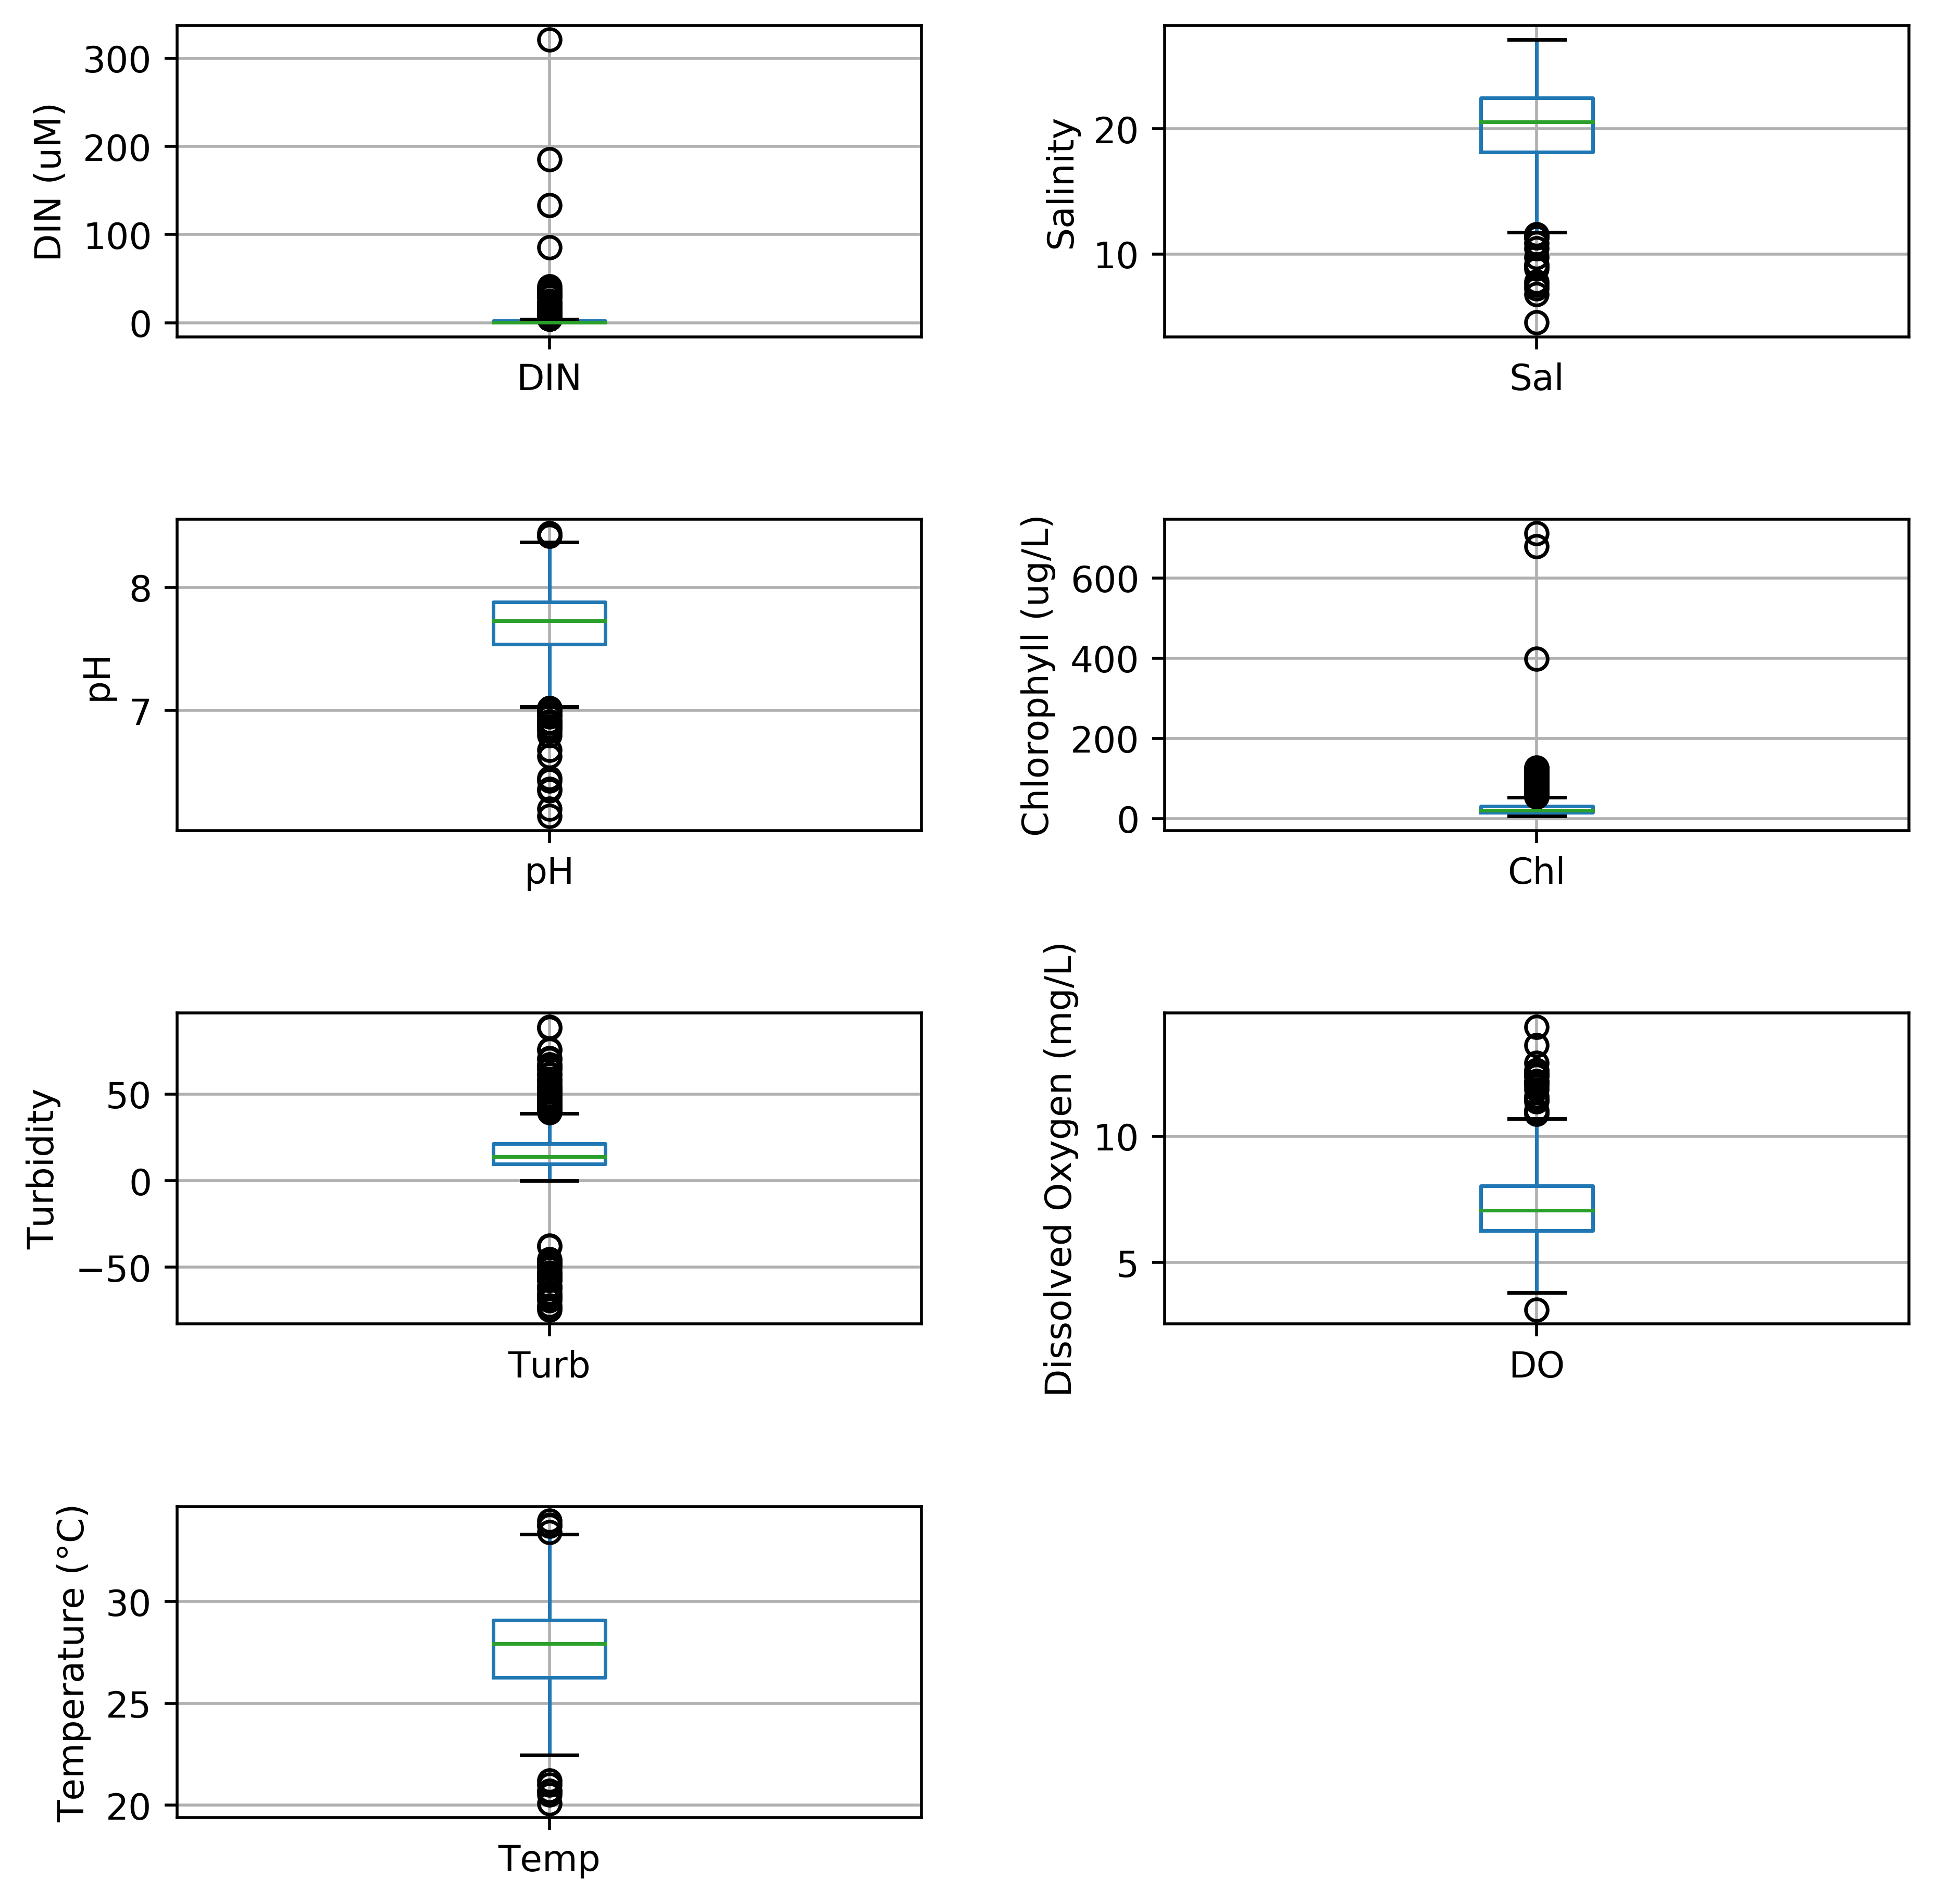

In [5]:
fig, axs = plt.subplots(4, 2, figsize = (8, 8), dpi = 500)
fig.tight_layout(pad=3.0) #This increases the spacing between subplots!

axs[0, 0] = data.boxplot('DIN', ax=axs[0,0]) #DIN
axs[0, 0].set_ylabel('DIN (uM)')

axs[0, 1] = data.boxplot('Sal', ax=axs[0,1]) #Salinity
axs[0, 1].set_ylabel('Salinity')

axs[1, 0] = data.boxplot('pH', ax=axs[1,0]) #pH 
axs[1, 0].set_ylabel('pH')

axs[1, 1] = data.boxplot('Chl', ax=axs[1,1]) #Chlorophyll
axs[1, 1].set_ylabel('Chlorophyll (ug/L)')

axs[2, 0] = data.boxplot('Turb', ax=axs[2,0]) #Turbidity
axs[2, 0].set_ylabel('Turbidity')

axs[2, 1] = data.boxplot('DO', ax=axs[2,1]) #Dissolved Oxygen
axs[2, 1].set_ylabel('Dissolved Oxygen (mg/L)')

axs[3, 0] = data.boxplot('Temp', ax=axs[3,0]) #Temperature
axs[3, 0].set_ylabel('Temperature (\N{DEGREE SIGN}C)')


fig.delaxes(axs[3,1]) # remove empty subplot

Another way to visualize the distribution of the data is using the above box and whisker plots. These plots are useful because they give us some analytics on each variable, such as the median datapoint, 25% and 75% quartiles, maxima and minima based on quartiles,  and outliers, datapoint which are beyond the maxima and minima points, representing less then 0.7% of the total data. The data in these plots are distributed in the same way as in the previous histograms, but we can see in some of them, such as chlorophyll and DIN, that have extremely high outliers and tubidity, which contains negative datapoints (obviously not possible). Overall, these plots make it easy to see that there are many outlier datapoints that are skewing the statistics of the data.

From these methods of looking at the data, we can clearly see that some values, such as DIN, salinity, and turbidity have erroneous values, skewing the dataset. From personal use of the instruments, I also know that YSI 6600 V2 sondes are not accurate above roughly 200 ug/L of chlorophyll a. To correct for these datapoints, we will have to edit the thresholds of each variable, remove the datapoints that fall in line with erroneous values.

In [6]:
# Making corrections to data that appear to have outliers (negative values, extreme high values, etc.)
corr_data = data[data.DIN < 50]
corr_data = corr_data[corr_data.DIN > 0.14] #This is the detection limit of NOx
corr_data = corr_data[corr_data.Chl < 200]
corr_data = corr_data[corr_data.Turb > 0]
corr_data = corr_data[corr_data.Turb < 50] #Correcting for known turbidity spikes when YSI sondes hit sediment during profiles.
corr_data = corr_data[corr_data.Sal > 15] #Corrected for known low salinity values due to probe failure. Will also correct for error temperature values
corr_data = corr_data[corr_data.pH >6.7] #Correcting for know pH probe failures.

corr_data.Precipitation = corr_data.Precipitation * 8 * 0.0254 #Transforming precipitation from 1/8" to inches to meters
corr_data.Wind_Speed = corr_data.Wind_Speed * 0.44704 #Transforming wind speed from miles/hour to meters/second

Here I have made corrections to the data, either due to data distribution patterns or known issues with certain instruments at particular times. I also made corrections to the outside data sources as they were presented as non-metric values.

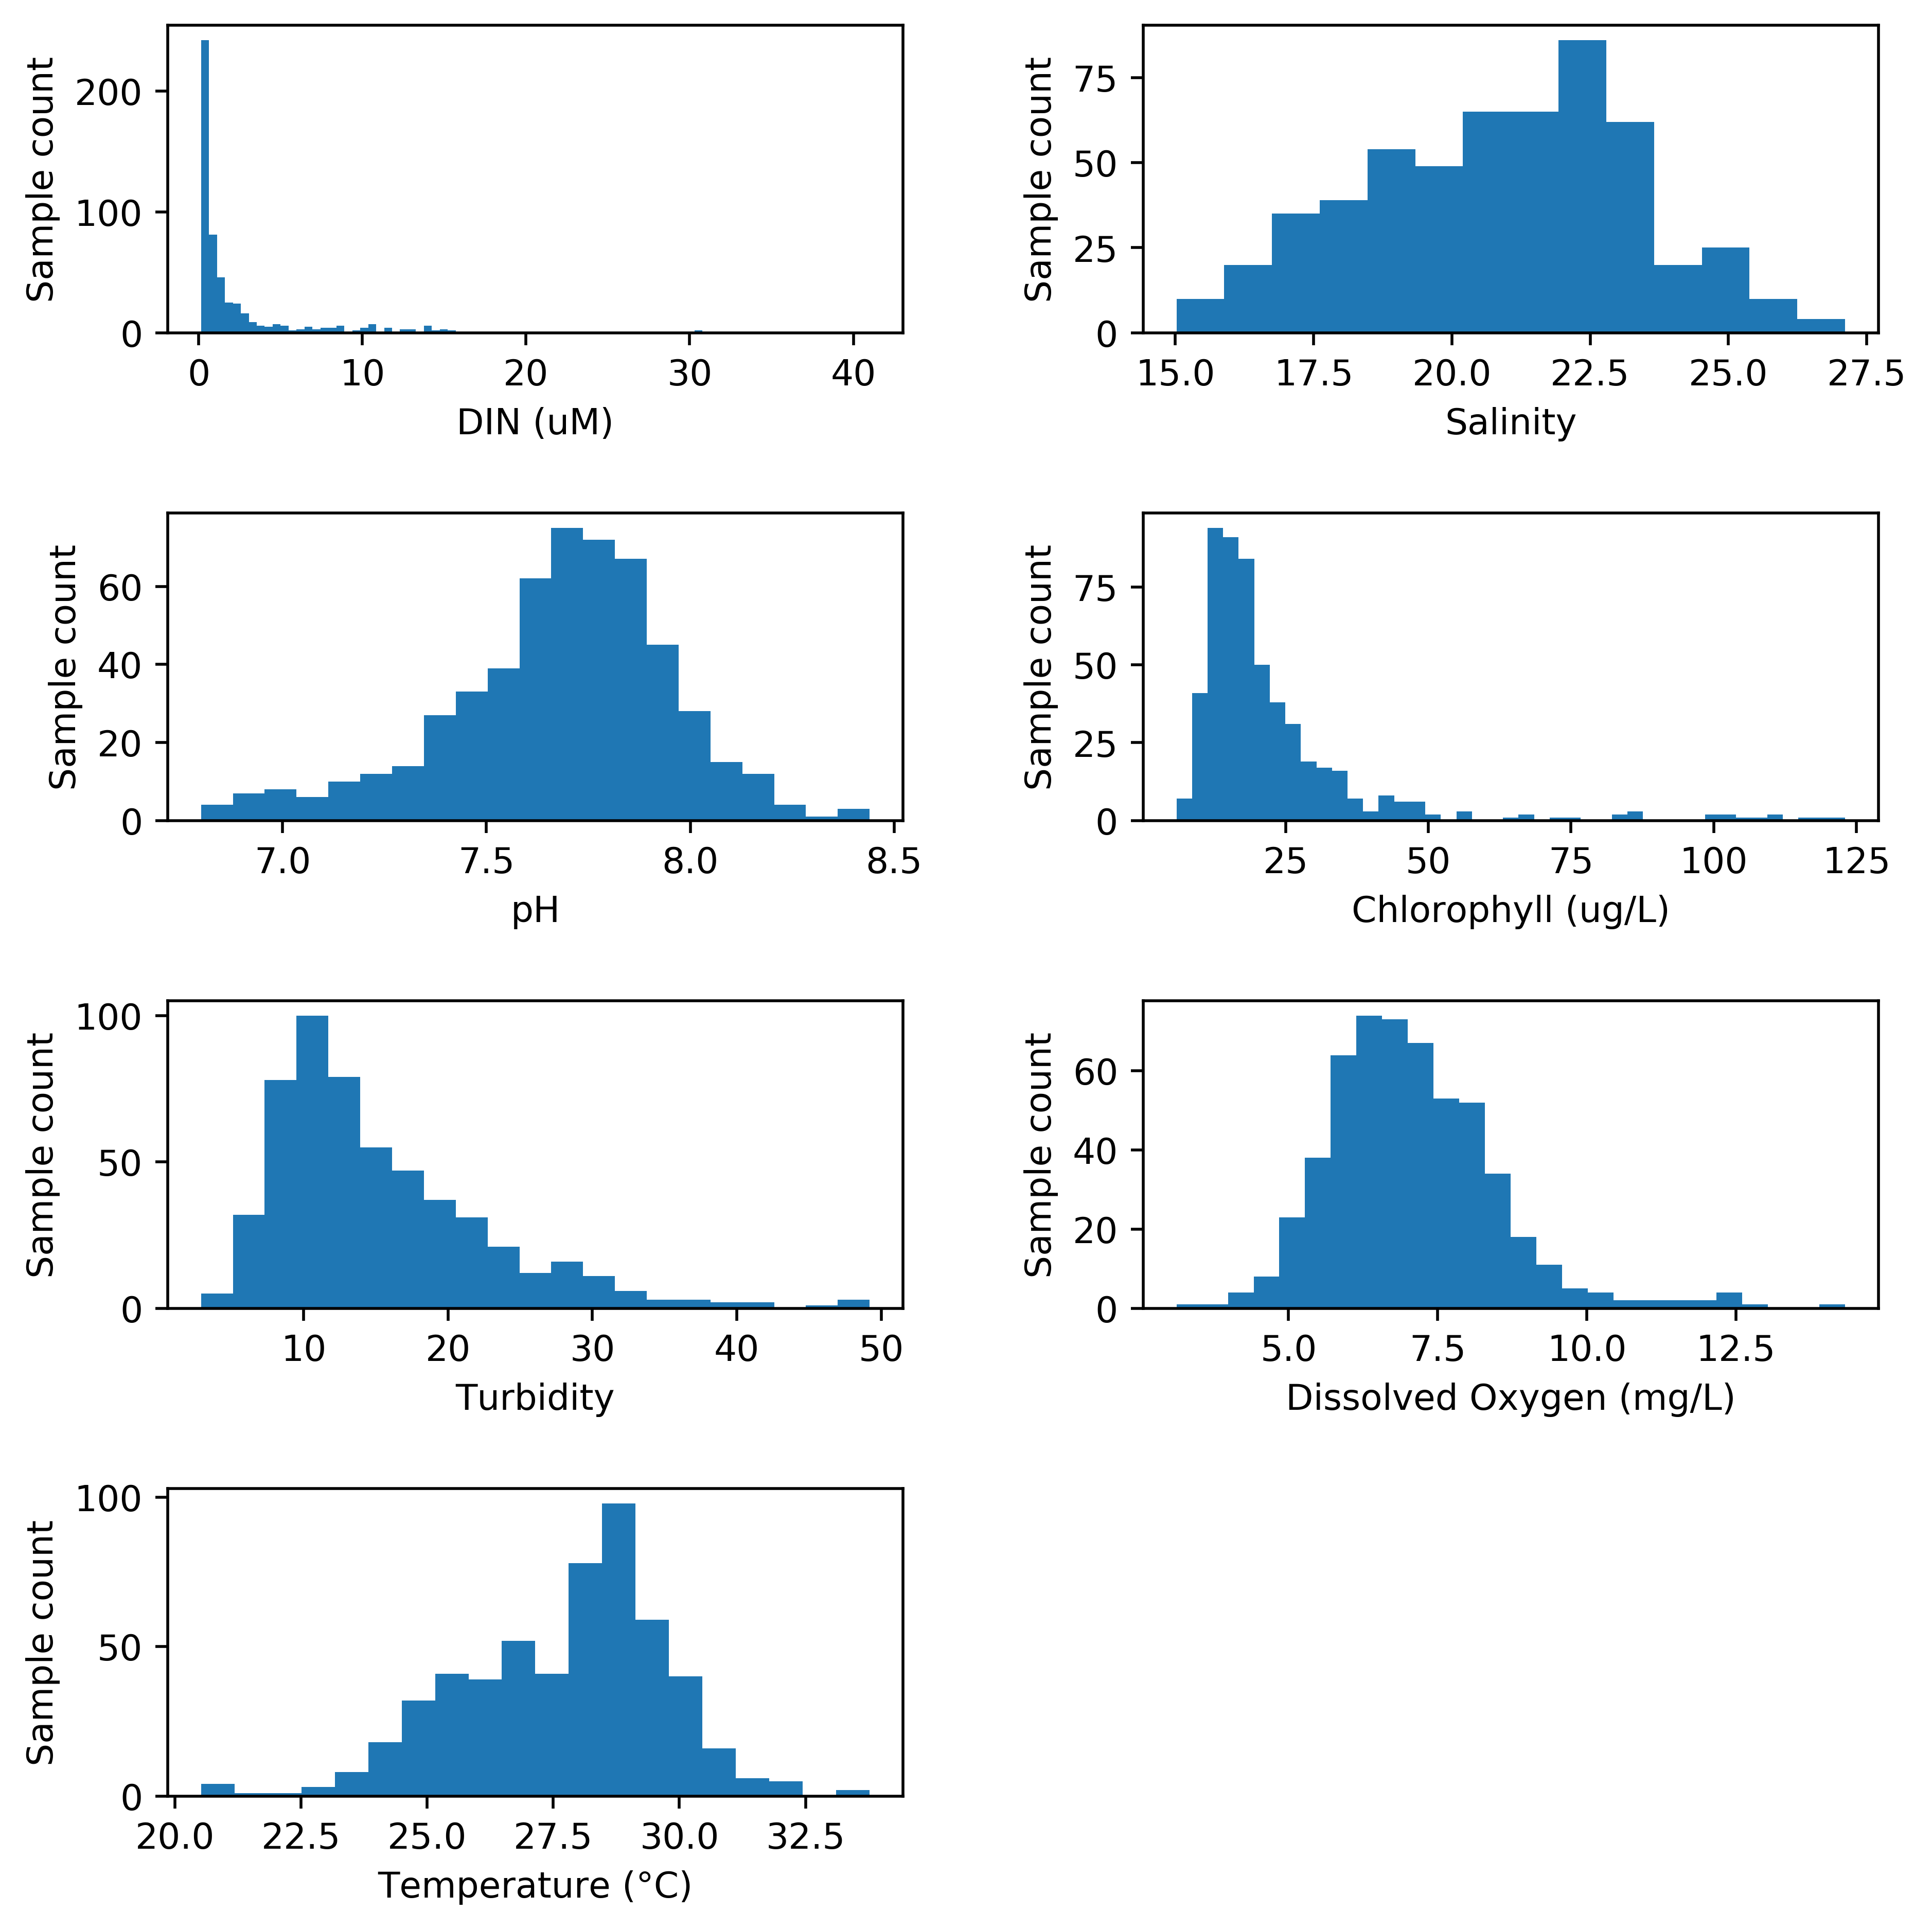

In [7]:
#Check to see where the corrected variable data points lie. 
fig, axs = plt.subplots(4, 2, figsize = (8, 8), dpi = 500)
fig.tight_layout(pad=3.0) #This increases the spacing between subplots!

axs[0, 0].hist(corr_data.DIN, bins='auto') #DIN
axs[0, 0].set_xlabel('DIN (uM)')
axs[0, 0].set_ylabel('Sample count')

axs[0, 1].hist(corr_data.Sal, bins='auto') #Salinity
axs[0, 1].set_xlabel('Salinity')
axs[0, 1].set_ylabel('Sample count')

axs[1, 0].hist(corr_data.pH, bins='auto') #pH 
axs[1, 0].set_xlabel('pH')
axs[1, 0].set_ylabel('Sample count')

axs[1, 1].hist(corr_data.Chl, bins='auto') #Chlorophyll
axs[1, 1].set_xlabel('Chlorophyll (ug/L)')
axs[1, 1].set_ylabel('Sample count')

axs[2, 0].hist(corr_data.Turb, bins='auto') #Turbidity
axs[2, 0].set_xlabel('Turbidity')
axs[2, 0].set_ylabel('Sample count')

axs[2, 1].hist(corr_data.DO, bins='auto') #Dissolved Oxygen
axs[2, 1].set_xlabel('Dissolved Oxygen (mg/L)')
axs[2, 1].set_ylabel('Sample count')

axs[3, 0].hist(corr_data.Temp, bins='auto') #Temperature
axs[3, 0].set_xlabel('Temperature (\N{DEGREE SIGN}C)')
axs[3, 0].set_ylabel('Sample count')

fig.delaxes(axs[3,1]) # remove empty subplot

Once again, these historgram plots are a good way to visualize the distribution of the data for each individual variable. After correcting the data for any known erroneous data and/or unusual high values known to be false, the same trends can still be seen, with salinity, pH, dissolved oxygen, and temperature all showing nice parabolic distributions. DIN, chlorophyll, and turbidity all still have obvious negative exponential distributions, though they are all much more clear in the corrected data. Do note that the the number of DIN samples all still fall close to 0. This is because summer DIN concentrations in the Lafayette are often rather low and near the detection limit as phytoplankton blooms occur.

In [8]:
corr_data.describe()

,Month,Day,Year,Depth_ID,Depth,Urea,DIN,PO4,Temp,Sal,pH,Chl,Turb,DO,Tide,Precipitation,Wind_Speed,Wind_Dir,Bloom
count,544.000000,544.000000,544.000000,544.000000,544.000000,538.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,7.496324,15.759191,2017.266544,2.020221,2.631434,0.158787,2.784290,1.878311,27.701507,20.852279,7.677059,22.945273,15.336213,7.073254,0.213572,0.002845,3.394149,161.814992,0.604779
std,1.047660,8.433627,1.159754,0.817373,1.932852,0.241180,5.275733,1.333747,2.034620,2.468798,0.277100,17.161374,7.521769,1.419780,0.291442,0.008307,1.101212,63.983559,0.489348
min,5.000000,1.000000,2016.000000,1.000000,0.250000,0.031950,0.150000,0.030000,20.520000,15.020000,6.800000,5.883750,2.900000,3.120000,-0.352000,0.000000,1.580606,40.285714,0.000000
25%,7.000000,8.000000,2016.000000,1.000000,0.500000,0.080000,0.330000,0.767750,26.295000,18.957500,7.530000,13.869600,9.900000,6.115000,-0.029000,0.000000,2.628053,104.835488,0.000000
50%,8.000000,17.000000,2017.000000,2.000000,2.500000,0.080000,0.765500,1.695000,28.050000,21.085000,7.700000,17.800000,13.300000,6.910000,0.219000,0.000000,3.281928,168.636364,1.000000
75%,8.000000,22.000000,2018.000000,3.000000,4.750000,0.130000,2.337000,2.800000,29.092500,22.610000,7.860000,25.025000,19.000000,7.880000,0.424250,0.000963,3.992530,216.666667,1.000000
max,9.000000,31.000000,2019.000000,3.000000,6.000000,2.414990,40.994000,9.110000,33.770000,27.110000,8.440000,123.000000,49.200000,14.330000,1.165000,0.082329,7.628521,303.333333,1.000000


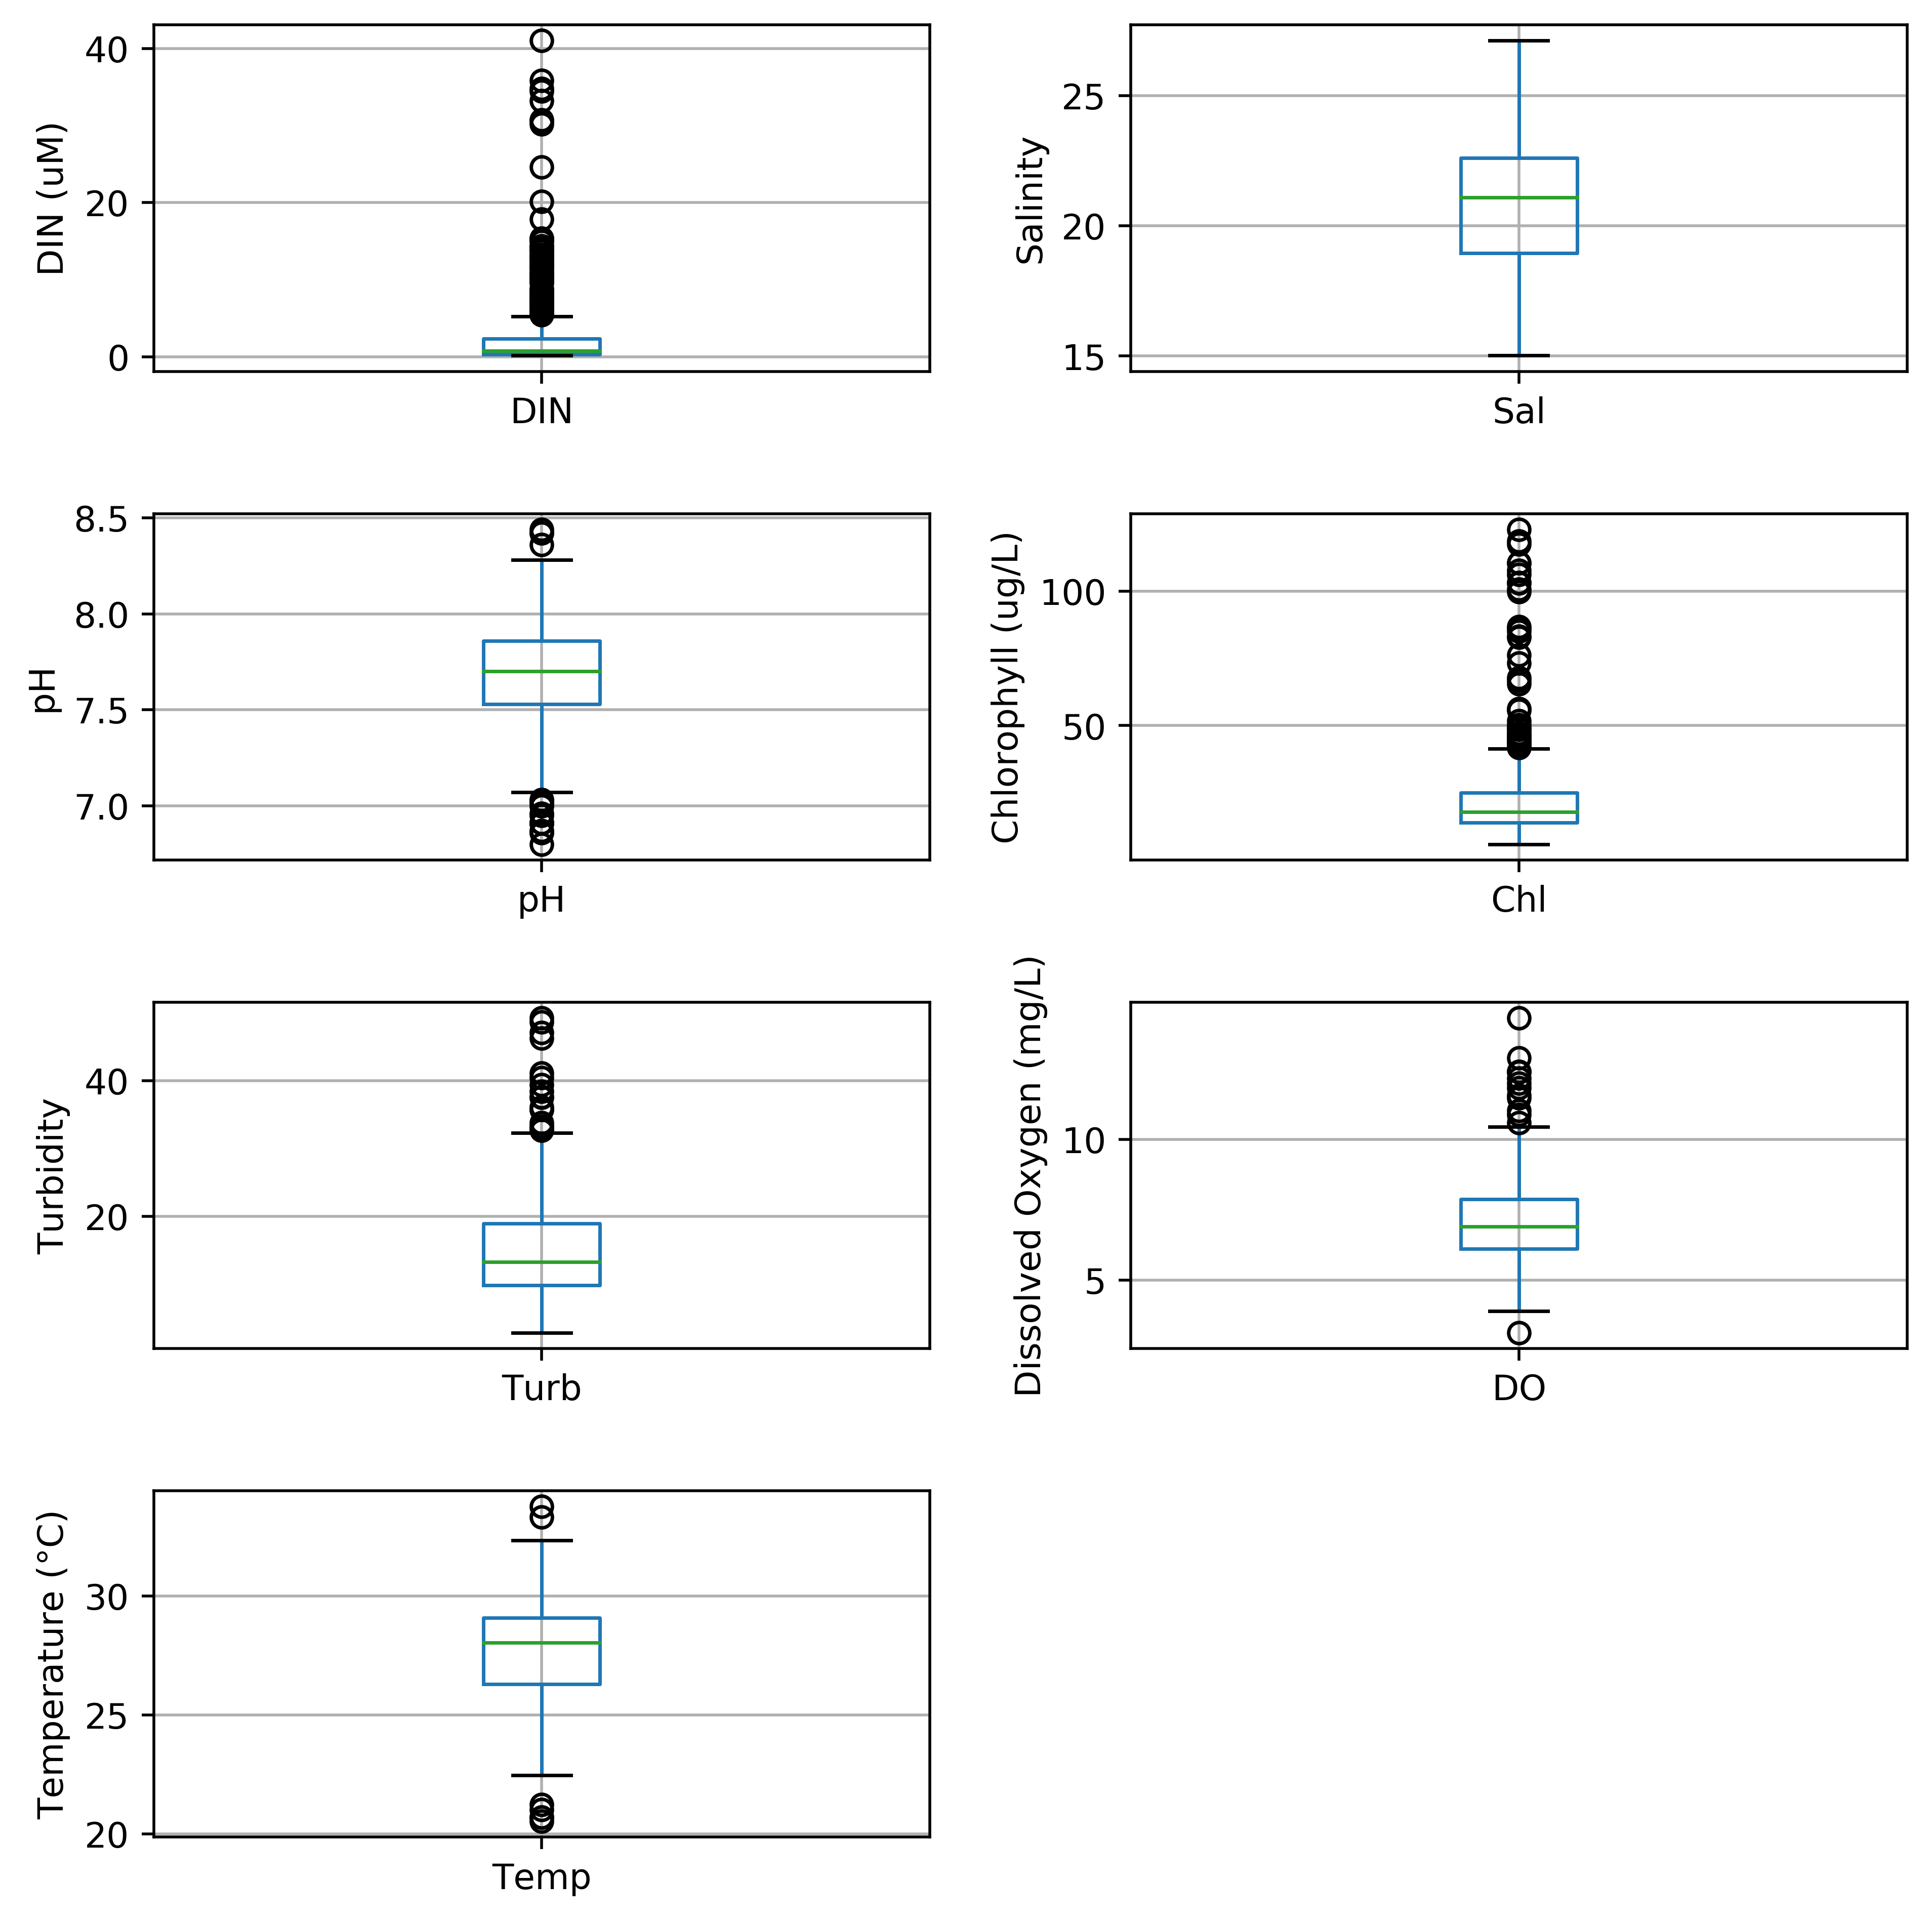

In [9]:
fig, axs = plt.subplots(4, 2, figsize = (8, 8), dpi = 500)
fig.tight_layout(pad=2.0) #This increases the spacing between subplots!

axs[0, 0] = corr_data.boxplot('DIN', ax=axs[0,0]) #DIN
axs[0, 0].set_ylabel('DIN (uM)')

axs[0, 1] = corr_data.boxplot('Sal', ax=axs[0,1]) #Salinity
axs[0, 1].set_ylabel('Salinity')

axs[1, 0] = corr_data.boxplot('pH', ax=axs[1,0]) #pH 
axs[1, 0].set_ylabel('pH')

axs[1, 1] = corr_data.boxplot('Chl', ax=axs[1,1]) #Chlorophyll
axs[1, 1].set_ylabel('Chlorophyll (ug/L)')

axs[2, 0] = corr_data.boxplot('Turb', ax=axs[2,0]) #Turbidity
axs[2, 0].set_ylabel('Turbidity')

axs[2, 1] = corr_data.boxplot('DO', ax=axs[2,1]) #Dissolved Oxygen
axs[2, 1].set_ylabel('Dissolved Oxygen (mg/L)')

axs[3, 0] = corr_data.boxplot('Temp', ax=axs[3,0]) #Temperature
axs[3, 0].set_ylabel('Temperature (\N{DEGREE SIGN}C)')

fig.delaxes(axs[3,1]) # remove empty subplot

The biggest change we can see in the box plots with the corrected data is the reduction of outliers. The distributions of the median values and quartiles are slightly different for most of the variables. We can see that the DIN concentration plot still has many outliers, but that it likely due to the very large number of samples with lower nutrient values. We have no legitimate reason to ignore the higher outliers. Similarly, there are many very high chlorophyll outliers. Once again, we do not have any reason to not trust these higher values as long as they are under 200 ug/L.  

Text(2004.2702020202014, 0.5, 'Temperature')

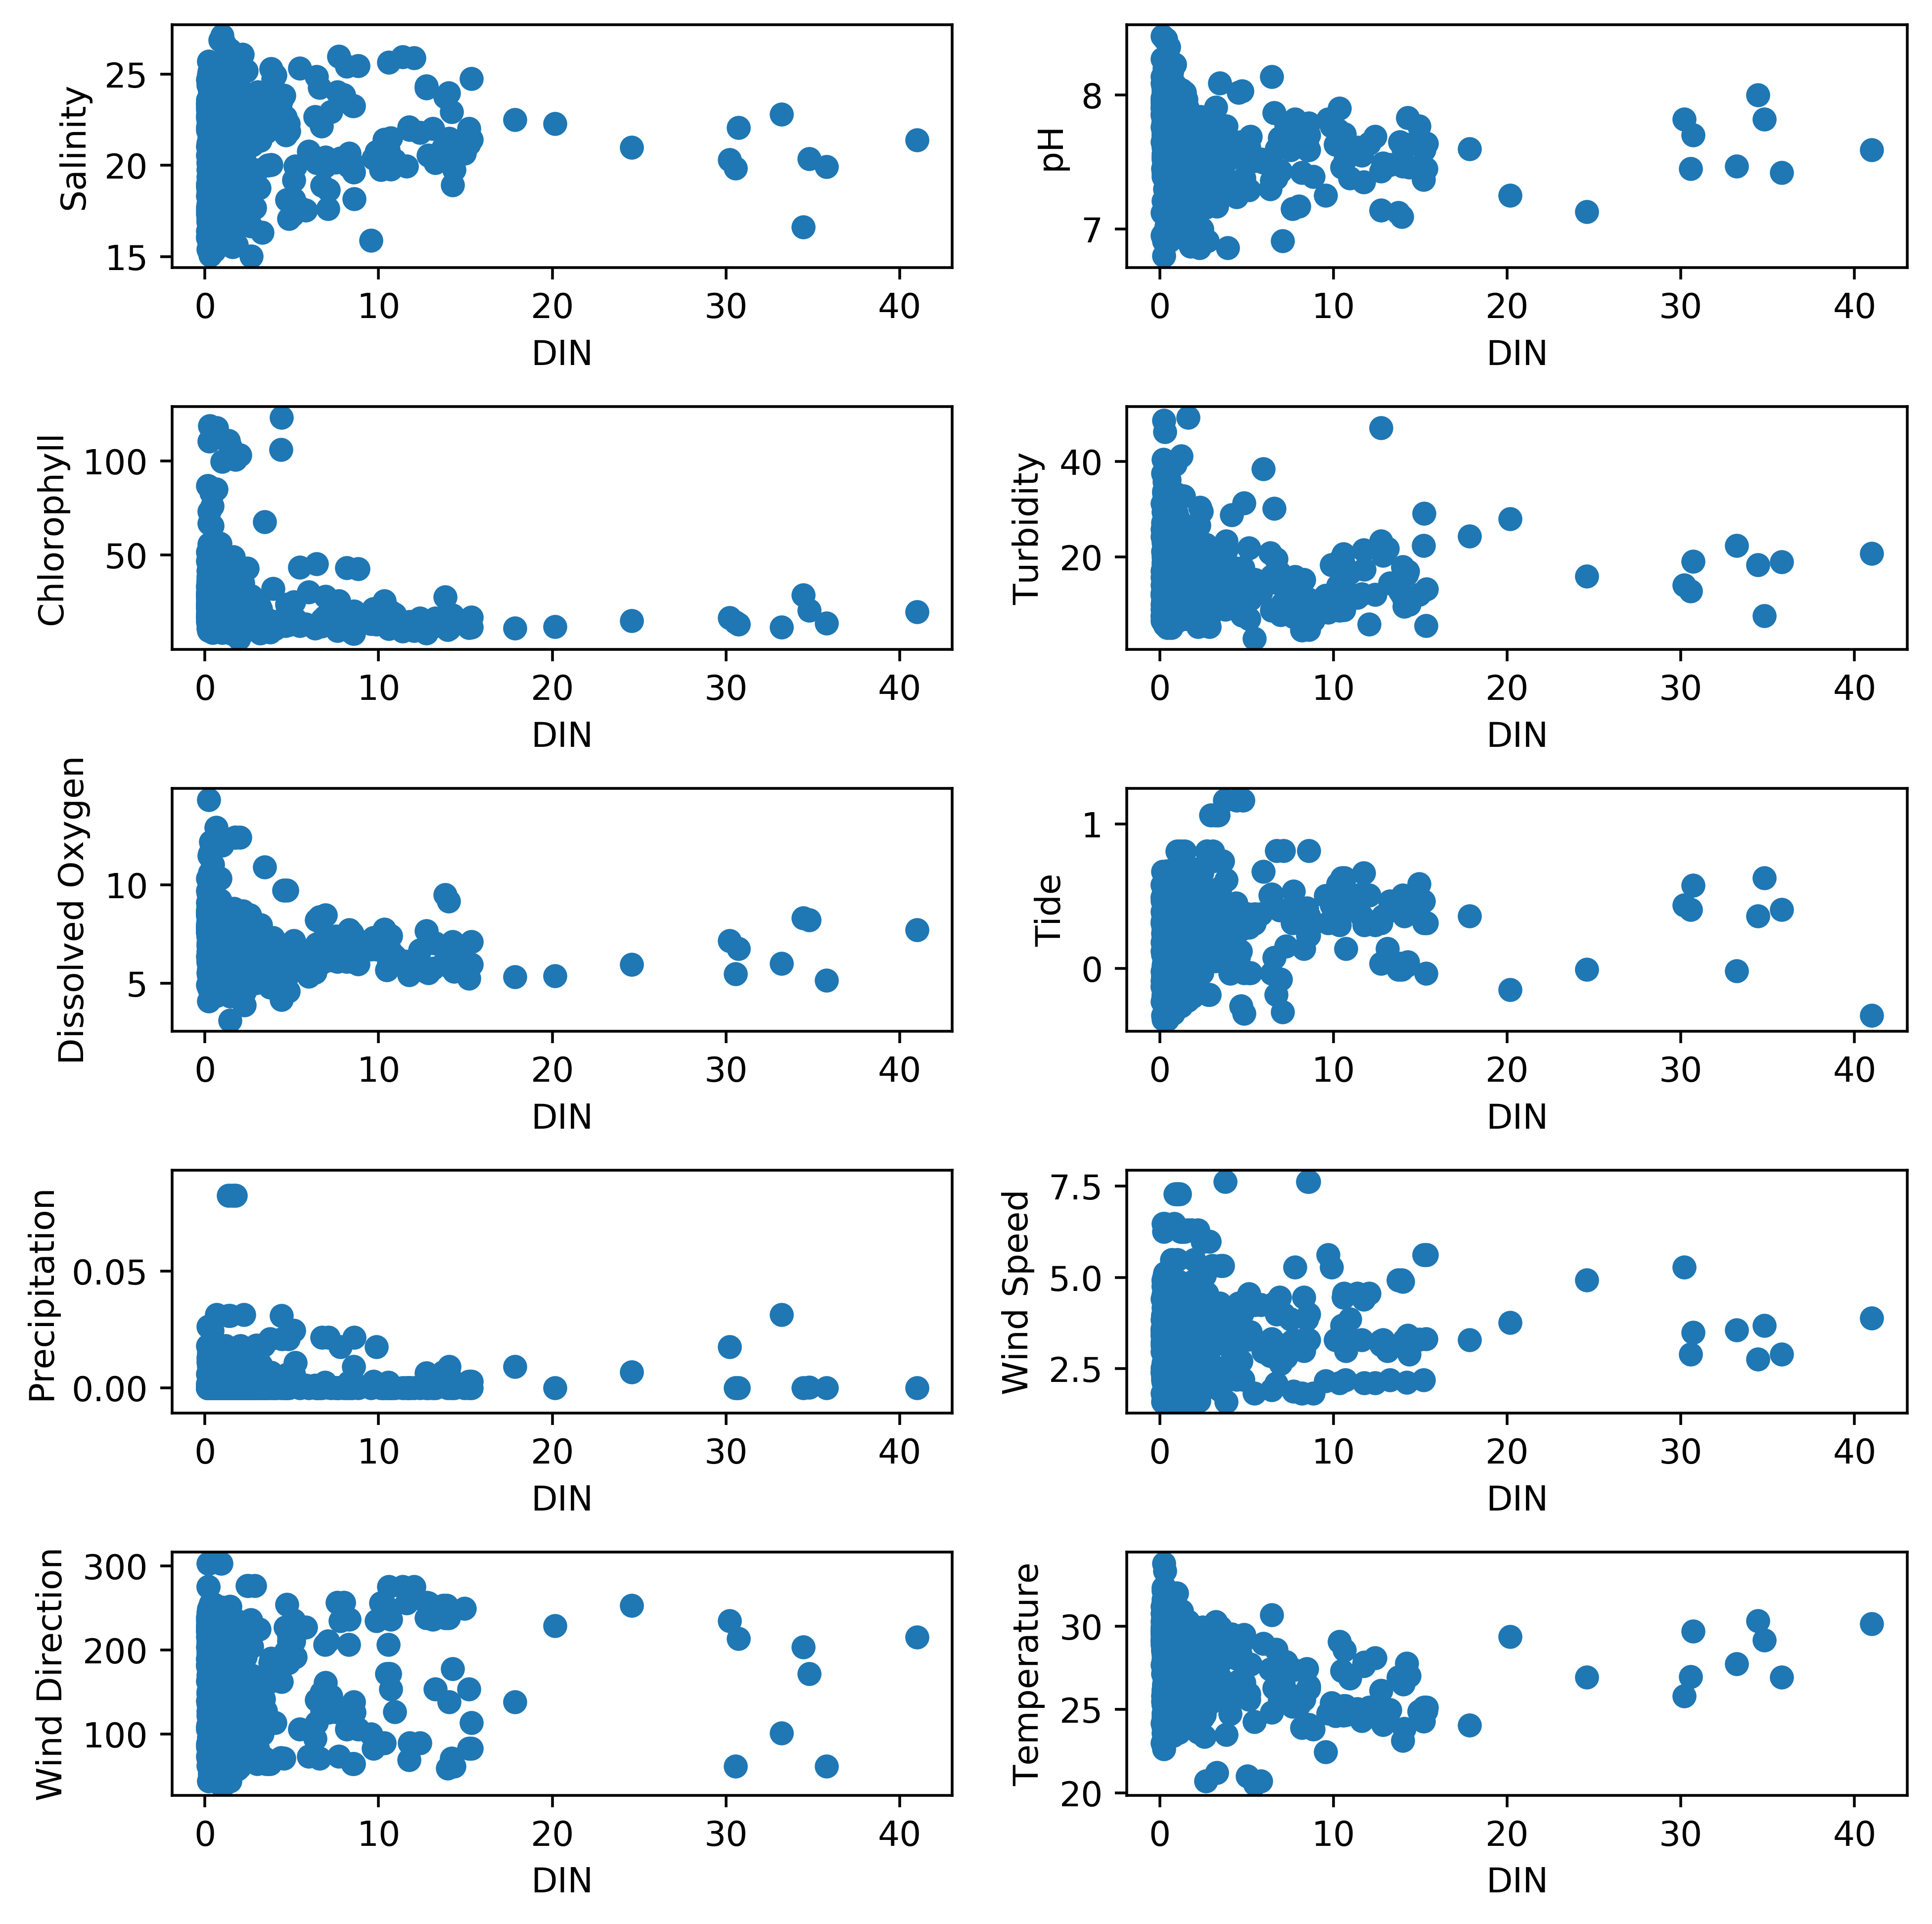

In [10]:
#Looking at all of the data against DIN
fig, axs = plt.subplots(5, 2, figsize = (8, 8), dpi = 500)
fig.tight_layout(pad=2.0) #This increases the spacing between subplots!

axs[0, 0].scatter(corr_data.DIN,corr_data.Sal)
axs[0, 0].set_xlabel('DIN')
axs[0, 0].set_ylabel('Salinity')

axs[0, 1].scatter(corr_data.DIN,corr_data.pH)
axs[0, 1].set_xlabel('DIN')
axs[0, 1].set_ylabel('pH')

axs[1, 0].scatter(corr_data.DIN,corr_data.Chl)
axs[1, 0].set_xlabel('DIN')
axs[1, 0].set_ylabel('Chlorophyll')

axs[1, 1].scatter(corr_data.DIN,corr_data.Turb)
axs[1, 1].set_xlabel('DIN')
axs[1, 1].set_ylabel('Turbidity')

axs[2, 0].scatter(corr_data.DIN,corr_data.DO)
axs[2, 0].set_xlabel('DIN')
axs[2, 0].set_ylabel('Dissolved Oxygen')

axs[2, 1].scatter(corr_data.DIN,corr_data.Tide)
axs[2, 1].set_xlabel('DIN')
axs[2, 1].set_ylabel('Tide')

axs[3, 0].scatter(corr_data.DIN,corr_data.Precipitation)
axs[3, 0].set_xlabel('DIN')
axs[3, 0].set_ylabel('Precipitation')

axs[3, 1].scatter(corr_data.DIN,corr_data.Wind_Speed)
axs[3, 1].set_xlabel('DIN')
axs[3, 1].set_ylabel('Wind Speed')

axs[4, 0].scatter(corr_data.DIN,corr_data.Wind_Dir)
axs[4, 0].set_xlabel('DIN')
axs[4, 0].set_ylabel('Wind Direction')

axs[4, 1].scatter(corr_data.DIN,corr_data.Temp)
axs[4, 1].set_xlabel('DIN')
axs[4, 1].set_ylabel('Temperature')


Looking at all of the variables in comparison to DIN, there are very few obvious trends that stand out other than that of chlorophyll vs. DIN, dissolved oxygen vs. DIN, and turbidity vs. DIN, which all show negative exponential relationships. It would be interesting to look at these same relationships by year and by depth.

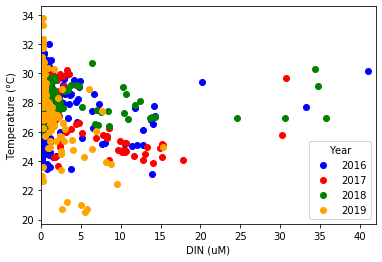

In [11]:
#Looking at temperature
corr_data_2016 = corr_data[corr_data.Year == 2016]
corr_data_2017 = corr_data[corr_data.Year == 2017]
corr_data_2018 = corr_data[corr_data.Year == 2018]
corr_data_2019 = corr_data[corr_data.Year == 2019]

plt.scatter(corr_data_2016.DIN, corr_data_2016.Temp, color = 'blue')
plt.scatter(corr_data_2017.DIN, corr_data_2017.Temp, color = 'red')
plt.scatter(corr_data_2018.DIN, corr_data_2018.Temp, color = 'green')
plt.scatter(corr_data_2019.DIN, corr_data_2019.Temp, color = 'orange')
plt.xlabel('DIN (uM)')
plt.ylabel('Temperature (\N{DEGREE SIGN}C)')
plt.xlim(0,42)
plt.legend(('2016','2017','2018','2019'), loc = 'lower right', title = 'Year')

Most of the elevated DIN concentrations appear to occur in the range of average summer water temperatures in the Lafayette (26-28 degrees C). There are low DIN concentration scattered among all temperature values sampled. 2019 has a cluster of DIN concentrations at lower temperatures, near 21 and higher temperatures, near 33. These solo cluters of temperatures are likely due to samples being taken in later spring and late summer/early fall. 2019 was the only year sampled that does not have DIN concentrations above 20 uM.

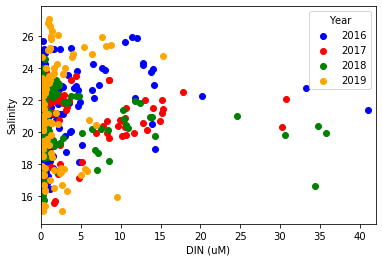

In [12]:
#Looking at salinity
corr_data_2016 = corr_data[corr_data.Year == 2016]
corr_data_2017 = corr_data[corr_data.Year == 2017]
corr_data_2018 = corr_data[corr_data.Year == 2018]
corr_data_2019 = corr_data[corr_data.Year == 2019]

plt.scatter(corr_data_2016.DIN, corr_data_2016.Sal, color = 'blue')
plt.scatter(corr_data_2017.DIN, corr_data_2017.Sal, color = 'red')
plt.scatter(corr_data_2018.DIN, corr_data_2018.Sal, color = 'green')
plt.scatter(corr_data_2019.DIN, corr_data_2019.Sal, color = 'orange')
plt.xlabel('DIN (uM)')
plt.ylabel('Salinity')
plt.xlim(0,42)
plt.legend(('2016','2017','2018','2019'), loc = 'upper right', title = 'Year')

Most of the elevated summer DIN concentrations appear to occur at mid salinities for the Lafayette River in all years. There are low DIN concentration scattered among all salinity values sampled. 

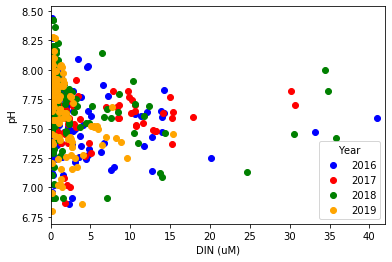

In [13]:
#Looking at pH
corr_data_2016 = corr_data[corr_data.Year == 2016]
corr_data_2017 = corr_data[corr_data.Year == 2017]
corr_data_2018 = corr_data[corr_data.Year == 2018]
corr_data_2019 = corr_data[corr_data.Year == 2019]

plt.scatter(corr_data_2016.DIN, corr_data_2016.pH, color = 'blue')
plt.scatter(corr_data_2017.DIN, corr_data_2017.pH, color = 'red')
plt.scatter(corr_data_2018.DIN, corr_data_2018.pH, color = 'green')
plt.scatter(corr_data_2019.DIN, corr_data_2019.pH, color = 'orange')
plt.xlabel('DIN (uM)')
plt.ylabel('pH')
plt.xlim(0,42)
plt.legend(('2016','2017','2018','2019'), loc = 'lower right', title = 'Year')

The majority of elevated DIN concentrations occur between a pH of 7.25 and 8. There are low DIN concentration scattered among all pH values sampled.

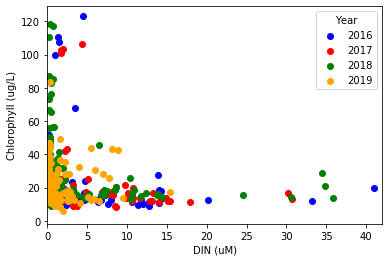

In [14]:
#Looking at Chlorophyll
corr_data_2016 = corr_data[corr_data.Year == 2016]
corr_data_2017 = corr_data[corr_data.Year == 2017]
corr_data_2018 = corr_data[corr_data.Year == 2018]
corr_data_2019 = corr_data[corr_data.Year == 2019]

plt.scatter(corr_data_2016.DIN, corr_data_2016.Chl, color = 'blue')
plt.scatter(corr_data_2017.DIN, corr_data_2017.Chl, color = 'red')
plt.scatter(corr_data_2018.DIN, corr_data_2018.Chl, color = 'green')
plt.scatter(corr_data_2019.DIN, corr_data_2019.Chl, color = 'orange')
plt.xlabel('DIN (uM)')
plt.ylabel('Chlorophyll (ug/L)')
plt.xlim(0,42)
plt.legend(('2016','2017','2018','2019'), loc = 'upper right', title = 'Year')

Elevated DIN concentrations are found when chlorophyll values are lower in all years. All years have a cluster of low chlorophyll concentrations and low DIN concentrations. 2017 and 2019 had very few high chlorophyll samples compared to 2016 and 2018. Finally, the chlorophyll vs. DIN relationships appeaers to follow a negative exponential distribution in all years,

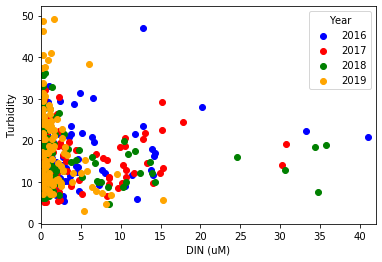

In [15]:
#Looking at Turbidity
corr_data_2016 = corr_data[corr_data.Year == 2016]
corr_data_2017 = corr_data[corr_data.Year == 2017]
corr_data_2018 = corr_data[corr_data.Year == 2018]
corr_data_2019 = corr_data[corr_data.Year == 2019]

plt.scatter(corr_data_2016.DIN, corr_data_2016.Turb, color = 'blue')
plt.scatter(corr_data_2017.DIN, corr_data_2017.Turb, color = 'red')
plt.scatter(corr_data_2018.DIN, corr_data_2018.Turb, color = 'green')
plt.scatter(corr_data_2019.DIN, corr_data_2019.Turb, color = 'orange')
plt.xlabel('DIN (uM)')
plt.ylabel('Turbidity')
plt.xlim(0,42)
plt.legend(('2016','2017','2018','2019'), loc = 'upper right', title = 'Year')

Interestingly, in all years, lower turbidity values have higher DIN concentrations. All years other than 2019 saw turbidities in a range lower than 40. Similar to the temperature values, 2019 appears to have a cluster of higher turbidity above 40. There is somewhat of a negative exponential trend in all years. 

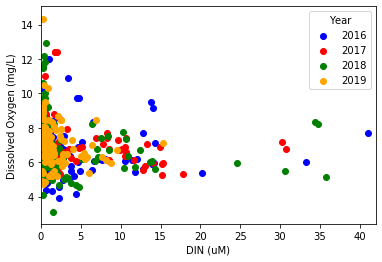

In [16]:
#Looking at Dissolved Oxygen
corr_data_2016 = corr_data[corr_data.Year == 2016]
corr_data_2017 = corr_data[corr_data.Year == 2017]
corr_data_2018 = corr_data[corr_data.Year == 2018]
corr_data_2019 = corr_data[corr_data.Year == 2019]

plt.scatter(corr_data_2016.DIN, corr_data_2016.DO, color = 'blue')
plt.scatter(corr_data_2017.DIN, corr_data_2017.DO, color = 'red')
plt.scatter(corr_data_2018.DIN, corr_data_2018.DO, color = 'green')
plt.scatter(corr_data_2019.DIN, corr_data_2019.DO, color = 'orange')
plt.xlabel('DIN (uM)')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.xlim(0,42)
plt.legend(('2016','2017','2018','2019'), loc = 'upper right', title = 'Year')

Dissolved oxygen (DO) shows a negative exponential relationship with DIN. There are some very low values of DO at low DIN concentrations during the two bloom years (2016 and 2018), likely due to bacterial growth after the death of a bloom. 2019 does also have a datapoint higher than every other year, just above 14 mg/L.

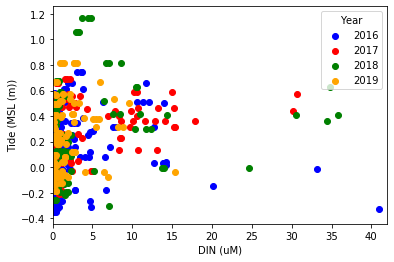

In [17]:
#Looking at Tide
corr_data_2016 = corr_data[corr_data.Year == 2016]
corr_data_2017 = corr_data[corr_data.Year == 2017]
corr_data_2018 = corr_data[corr_data.Year == 2018]
corr_data_2019 = corr_data[corr_data.Year == 2019]

plt.scatter(corr_data_2016.DIN, corr_data_2016.Tide, color = 'blue')
plt.scatter(corr_data_2017.DIN, corr_data_2017.Tide, color = 'red')
plt.scatter(corr_data_2018.DIN, corr_data_2018.Tide, color = 'green')
plt.scatter(corr_data_2019.DIN, corr_data_2019.Tide, color = 'orange')
plt.xlabel('DIN (uM)')
plt.ylabel('Tide (MSL (m))')
plt.xlim(0,42)
plt.legend(('2016','2017','2018','2019'), loc = 'upper right', title = 'Year')

Expectedly, the DIN concentrations are scattered along the tidal range, although it does appear that higher DIN concnetrations occur within a more "normal" tidal range and not at extremes.

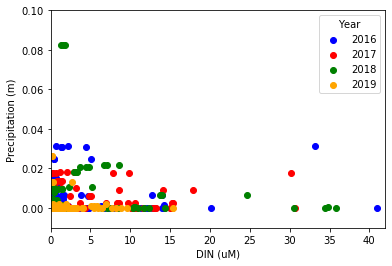

In [18]:
#Looking at Precipitation

corr_data_2016 = corr_data[corr_data.Year == 2016]
corr_data_2017 = corr_data[corr_data.Year == 2017]
corr_data_2018 = corr_data[corr_data.Year == 2018]
corr_data_2019 = corr_data[corr_data.Year == 2019]

plt.scatter(corr_data_2016.DIN, corr_data_2016.Precipitation, color = 'blue')
plt.scatter(corr_data_2017.DIN, corr_data_2017.Precipitation, color = 'red')
plt.scatter(corr_data_2018.DIN, corr_data_2018.Precipitation, color = 'green')
plt.scatter(corr_data_2019.DIN, corr_data_2019.Precipitation, color = 'orange')
plt.xlabel('DIN (uM)')
plt.ylabel('Precipitation (m)')
plt.xlim(0,42)
plt.ylim(-0.01,0.10)
plt.legend(('2016','2017','2018','2019'), loc = 'upper right', title = 'Year')

Precipitation amount was much greater during the summer months from 2016-2018, with very few precipitation events in 2019. For the most part, higher DIN values seems to be associated with little to no precipitation.

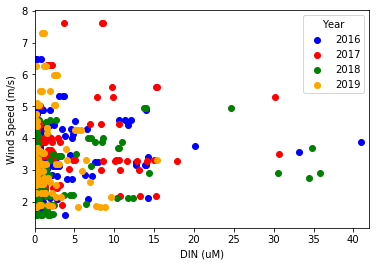

In [19]:
#Looking at wind speed
corr_data_2016 = corr_data[corr_data.Year == 2016]
corr_data_2017 = corr_data[corr_data.Year == 2017]
corr_data_2018 = corr_data[corr_data.Year == 2018]
corr_data_2019 = corr_data[corr_data.Year == 2019]

plt.scatter(corr_data_2016.DIN, corr_data_2016.Wind_Speed, color = 'blue')
plt.scatter(corr_data_2017.DIN, corr_data_2017.Wind_Speed, color = 'red')
plt.scatter(corr_data_2018.DIN, corr_data_2018.Wind_Speed, color = 'green')
plt.scatter(corr_data_2019.DIN, corr_data_2019.Wind_Speed, color = 'orange')
plt.xlabel('DIN (uM)')
plt.ylabel('Wind Speed (m/s)')
plt.xlim(0,42)
plt.legend(('2016','2017','2018','2019'), loc = 'upper right', title = 'Year')

Very similar to tidal events, wind speed does not show any real trend with DIN concentrations. In all years, wind speed is scattererd from 0-8 m/s. Most of the higher DIN concentration occur at wind speeds above 3 m/s.

F:\Anaconda3\lib\site-packages\windrose\windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
F:\Anaconda3\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
F:\Anaconda3\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
F:\Anaconda3\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  return lambda func: addendum(docstri

Text(0.5, 1.05, 'Wind Direction and DIN concentration')

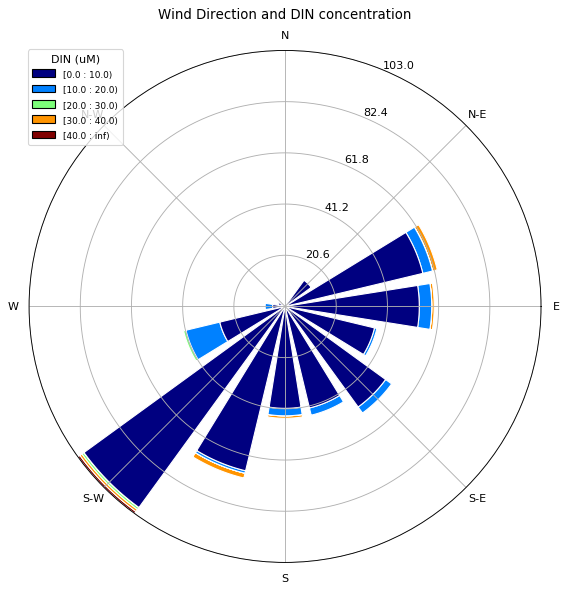

In [20]:
#Make a windrose plot to look at wind direction and DIN concentration

from windrose import WindroseAxes # v. 1.6.7 
import matplotlib.cm as cm # v. 3.1.1
from numpy.random import random # v. 1.16.2
from numpy import arange # v. 1.16.2

ax = WindroseAxes.from_ax()
ax.bar(corr_data.Wind_Dir, corr_data.DIN, bins = np.arange(0,45,10), opening = 0.8, edgecolor = 'white')
ax.set_legend(loc = 'upper left', title = 'DIN (uM)')
ax.set_title('Wind Direction and DIN concentration')

From this windrose plot, we can see that wind over the Lafayette River generally blows to the south-southwest/southwest and to the east/east-northeast. Interestingly, these wind directions are also associated with higher DIN concentrations. 

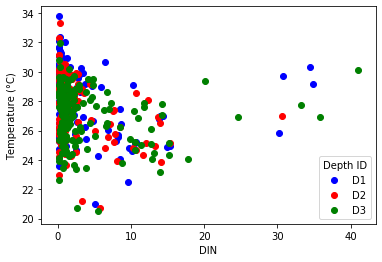

In [21]:
#Temperature
corr_data_D1 = corr_data[corr_data.Depth_ID == 1]
corr_data_D2 = corr_data[corr_data.Depth_ID == 2]
corr_data_D3 = corr_data[corr_data.Depth_ID == 3]

plt.scatter(corr_data_D1.DIN, corr_data_D1.Temp, color = 'blue')
plt.scatter(corr_data_D2.DIN, corr_data_D2.Temp, color = 'red')
plt.scatter(corr_data_D3.DIN, corr_data_D3.Temp, color = 'green')
plt.xlabel('DIN')
plt.ylabel('Temperature (\N{DEGREE SIGN}C)')
plt.legend(('D1','D2','D3'), loc = 'lower right', title = 'Depth ID')

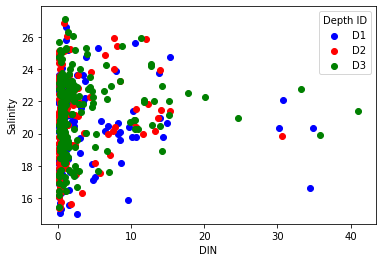

In [22]:
#Salinity
corr_data_D1 = corr_data[corr_data.Depth_ID == 1]
corr_data_D2 = corr_data[corr_data.Depth_ID == 2]
corr_data_D3 = corr_data[corr_data.Depth_ID == 3]

plt.scatter(corr_data_D1.DIN, corr_data_D1.Sal, color = 'blue')
plt.scatter(corr_data_D2.DIN, corr_data_D2.Sal, color = 'red')
plt.scatter(corr_data_D3.DIN, corr_data_D3.Sal, color = 'green')
plt.xlabel('DIN')
plt.ylabel('Salinity')
plt.legend(('D1','D2','D3'), loc = 'upper right', title = 'Depth ID')

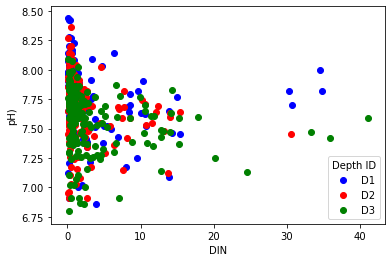

In [23]:
#pH
corr_data_D1 = corr_data[corr_data.Depth_ID == 1]
corr_data_D2 = corr_data[corr_data.Depth_ID == 2]
corr_data_D3 = corr_data[corr_data.Depth_ID == 3]

plt.scatter(corr_data_D1.DIN, corr_data_D1.pH, color = 'blue')
plt.scatter(corr_data_D2.DIN, corr_data_D2.pH, color = 'red')
plt.scatter(corr_data_D3.DIN, corr_data_D3.pH, color = 'green')
plt.xlabel('DIN')
plt.ylabel('pH)')
plt.legend(('D1','D2','D3'), loc = 'lower right', title = 'Depth ID')

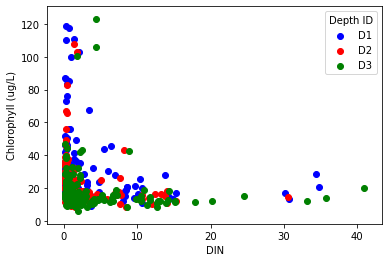

In [24]:
#Chlorophyll
corr_data_D1 = corr_data[corr_data.Depth_ID == 1]
corr_data_D2 = corr_data[corr_data.Depth_ID == 2]
corr_data_D3 = corr_data[corr_data.Depth_ID == 3]

plt.scatter(corr_data_D1.DIN, corr_data_D1.Chl, color = 'blue')
plt.scatter(corr_data_D2.DIN, corr_data_D2.Chl, color = 'red')
plt.scatter(corr_data_D3.DIN, corr_data_D3.Chl, color = 'green')
plt.xlabel('DIN')
plt.ylabel('Chlorophyll (ug/L)')
plt.legend(('D1','D2','D3'), loc = 'upper right', title = 'Depth ID')

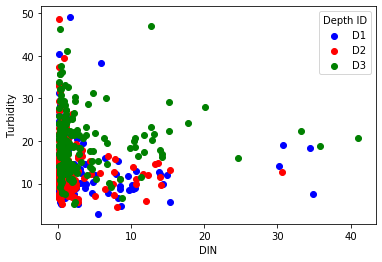

In [25]:
#Turbidity
corr_data_D1 = corr_data[corr_data.Depth_ID == 1]
corr_data_D2 = corr_data[corr_data.Depth_ID == 2]
corr_data_D3 = corr_data[corr_data.Depth_ID == 3]

plt.scatter(corr_data_D1.DIN, corr_data_D1.Turb, color = 'blue')
plt.scatter(corr_data_D2.DIN, corr_data_D2.Turb, color = 'red')
plt.scatter(corr_data_D3.DIN, corr_data_D3.Turb, color = 'green')
plt.xlabel('DIN')
plt.ylabel('Turbidity')
plt.legend(('D1','D2','D3'), loc = 'upper right', title = 'Depth ID')

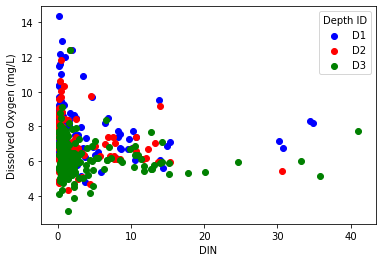

In [26]:
#Dissolved Oxygen
corr_data_D1 = corr_data[corr_data.Depth_ID == 1]
corr_data_D2 = corr_data[corr_data.Depth_ID == 2]
corr_data_D3 = corr_data[corr_data.Depth_ID == 3]

plt.scatter(corr_data_D1.DIN, corr_data_D1.DO, color = 'blue')
plt.scatter(corr_data_D2.DIN, corr_data_D2.DO, color = 'red')
plt.scatter(corr_data_D3.DIN, corr_data_D3.DO, color = 'green')
plt.xlabel('DIN')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.legend(('D1','D2','D3'), loc = 'upper right', title = 'Depth ID')

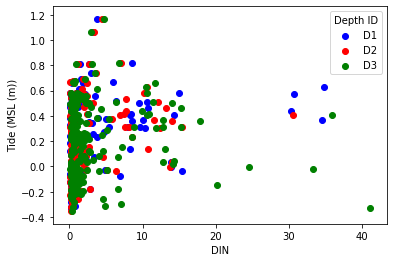

In [27]:
#Tide
corr_data_D1 = corr_data[corr_data.Depth_ID == 1]
corr_data_D2 = corr_data[corr_data.Depth_ID == 2]
corr_data_D3 = corr_data[corr_data.Depth_ID == 3]

plt.scatter(corr_data_D1.DIN, corr_data_D1.Tide, color = 'blue')
plt.scatter(corr_data_D2.DIN, corr_data_D2.Tide, color = 'red')
plt.scatter(corr_data_D3.DIN, corr_data_D3.Tide, color = 'green')
plt.xlabel('DIN')
plt.ylabel('Tide (MSL (m))')
plt.legend(('D1','D2','D3'), loc = 'upper right', title = 'Depth ID')

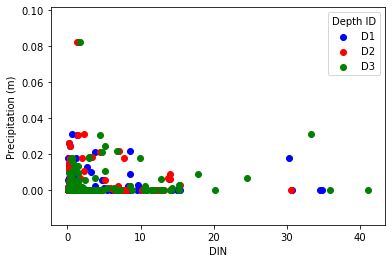

In [28]:
#Precipitation
corr_data_D1 = corr_data[corr_data.Depth_ID == 1]
corr_data_D2 = corr_data[corr_data.Depth_ID == 2]
corr_data_D3 = corr_data[corr_data.Depth_ID == 3]

plt.scatter(corr_data_D1.DIN, corr_data_D1.Precipitation, color = 'blue')
plt.scatter(corr_data_D2.DIN, corr_data_D2.Precipitation, color = 'red')
plt.scatter(corr_data_D3.DIN, corr_data_D3.Precipitation, color = 'green')
plt.xlabel('DIN')
plt.ylabel('Precipitation (m)')
plt.legend(('D1','D2','D3'), loc = 'upper right', title = 'Depth ID')

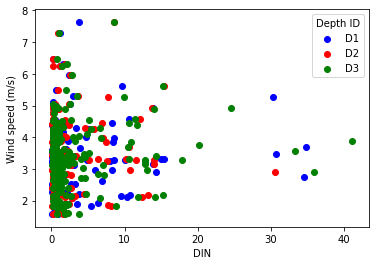

In [29]:
#Wind Speed
#change wind speed to m/s
corr_data_D1 = corr_data[corr_data.Depth_ID == 1]
corr_data_D2 = corr_data[corr_data.Depth_ID == 2]
corr_data_D3 = corr_data[corr_data.Depth_ID == 3]

plt.scatter(corr_data_D1.DIN, corr_data_D1.Wind_Speed, color = 'blue')
plt.scatter(corr_data_D2.DIN, corr_data_D2.Wind_Speed, color = 'red')
plt.scatter(corr_data_D3.DIN, corr_data_D3.Wind_Speed, color = 'green')
plt.xlabel('DIN')
plt.ylabel('Wind speed (m/s)')
plt.legend(('D1','D2','D3'), loc = 'upper right', title = 'Depth ID')

All of the relationship plots above are plotted by depth to see the distribution of the values with depth. In all plots, the relationships found in the year plots above remain, however, selected middle depths (D2) do not have higher DIN values, other than a single datapoint. Because of this, it does a good job at representing the lower DIN values, but not the higher ones. This is likely because D2 can have a very wide range of collected depth (from 1-5 m) compared to D1 and D3, which are always collected near the surface and just above the bottom, respectively. Higher DIN values at D1 are likely due to precipitation or runoff from land, while higher DIN values at D3 are likely due to resuspension of sediments. The arbitrary depth chosen for D2 may or may not "feel" the effects of either of these processes. By excluding D2, we have good representation of high and low DIN concentrations from D1 and D3 as can be seen in all of the relationship plots above.

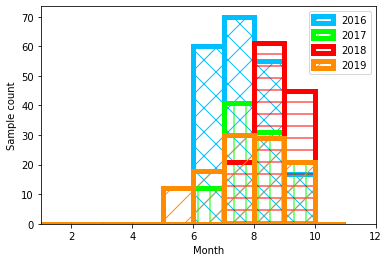

In [30]:
#Make this a side-by-side bar graph
month = np.arange(0,12,1.0)
plt.hist(corr_data[corr_data.Year == 2016].Month, facecolor = "none", edgecolor = "deepskyblue", lw = 5, align='mid', bins = month, hatch = 'x')
plt.hist(corr_data[corr_data.Year == 2017].Month, facecolor = "none", edgecolor = "lime", lw = 5, align='mid', bins = month, hatch = '|')
plt.hist(corr_data[corr_data.Year == 2018].Month, facecolor = "none", edgecolor = "red", lw = 5, align='mid', bins = month, hatch = '-')
plt.hist(corr_data[corr_data.Year == 2019].Month, facecolor = "none", edgecolor = "darkorange", lw = 5, align='mid', bins = month, hatch = '/')
plt.xlim(1,12)
plt.xlabel("Month")
plt.ylabel("Sample count")
labels = ("2016","2017","2018","2019")
plt.legend(labels)

([<matplotlib.axis.XTick at 0x1f46a459848>,
 <a list of 8 Text xticklabel objects>)

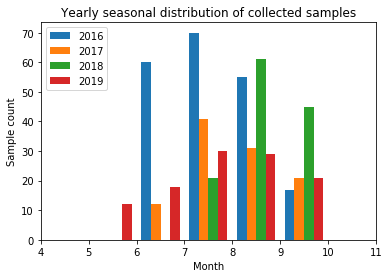

In [31]:
month = np.arange(4,12,1.0)
x = [corr_data[corr_data.Year == 2016].Month, corr_data[corr_data.Year == 2017].Month, corr_data[corr_data.Year == 2018].Month, corr_data[corr_data.Year == 2019].Month]
plt.hist(x, histtype='bar', lw = 8, bins = month)

labels = ("2016","2017","2018","2019")
plt.legend(labels, loc = 'upper left')
plt.title('Yearly seasonal distribution of collected samples')
#plt.xlim([1,12])
plt.xlabel("Month")
plt.ylabel("Sample count")
plt.xlim(4,11)
plt.xticks(np.arange(4, 12, step=1))

The two plots above show the temporal extent of the data. From the plots, we can see that in all years, the majority of the data was collected during the summer months, June-September. Only during 2019 were samples collected in both May and October. In order to keep the data more uniform, I will exclude the months of May and October from 2019. 

In [32]:
# Creating a variable for the portions of the dataset we would like to use.
used_data = corr_data[(corr_data.Depth_ID == 1) | (corr_data.Depth_ID == 3)]
used_data = used_data[(used_data.Month == 6) | (used_data.Month == 7) | (used_data.Month == 8)]

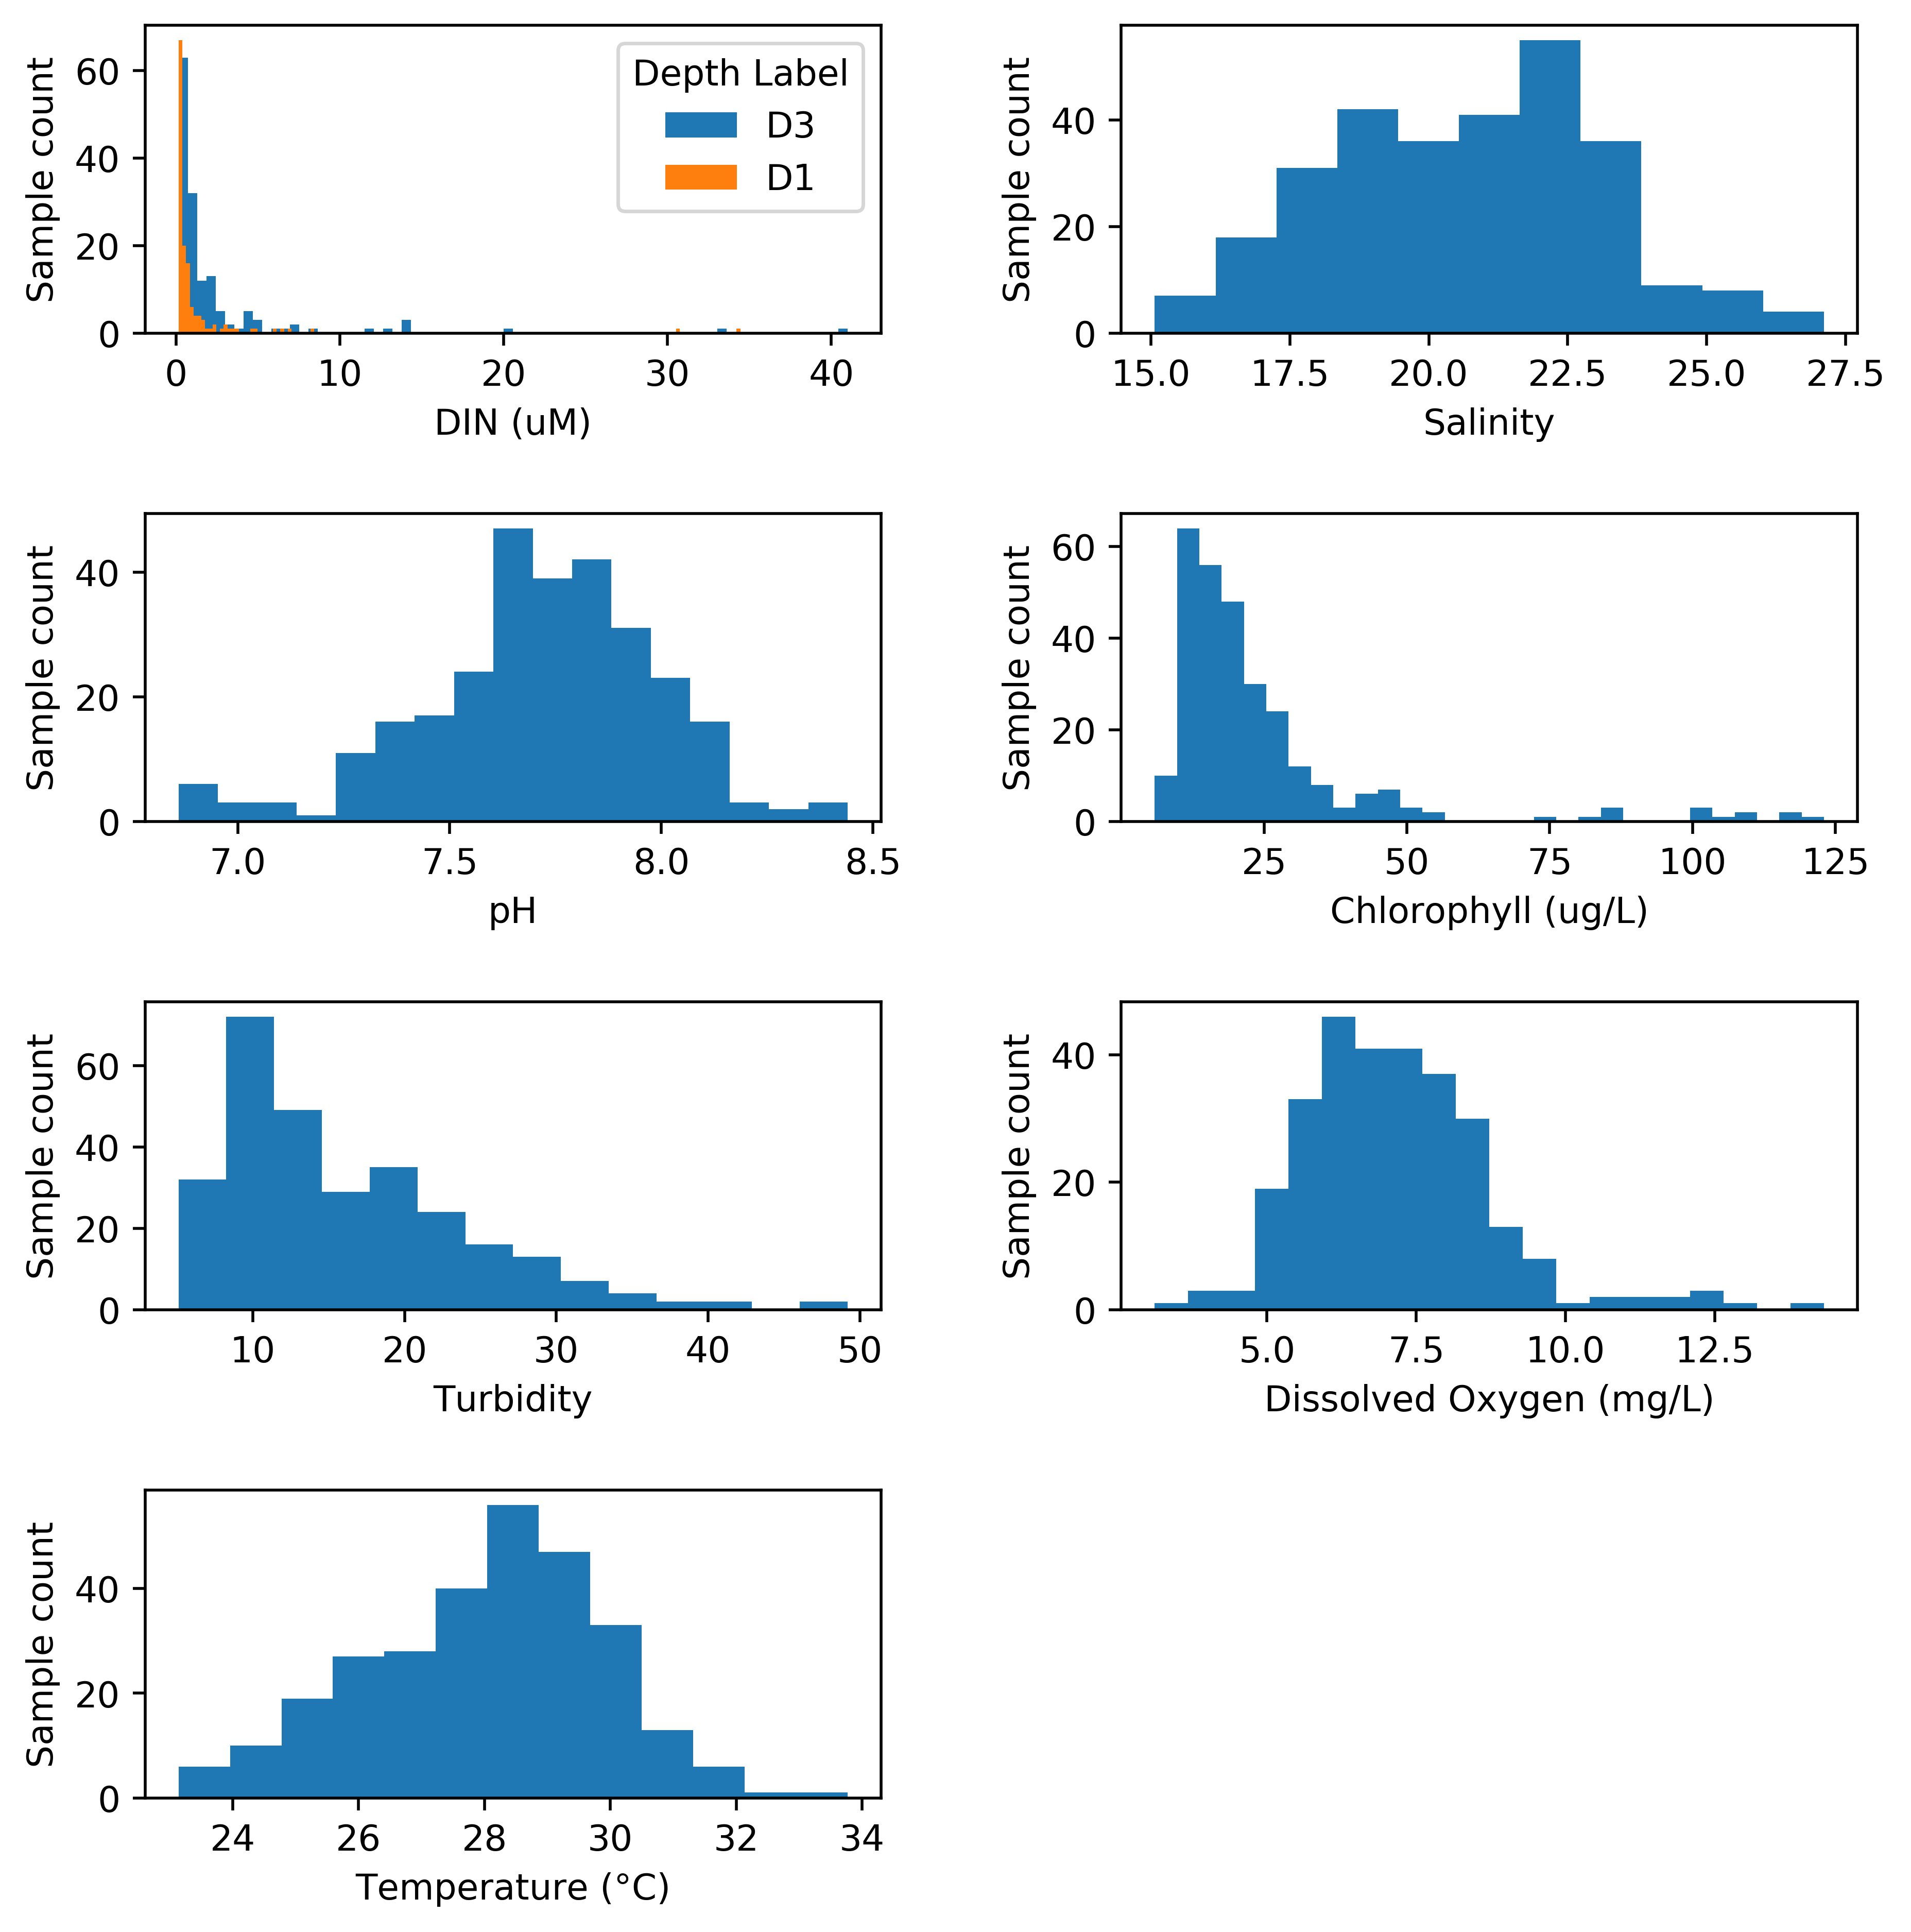

In [43]:
#Check the variables one more time after excluding D2 as well as May and October.
fig, axs = plt.subplots(4, 2, figsize = (8, 8), dpi = 500)
fig.tight_layout(pad=3.0) #This increases the spacing between subplots!

axs[0, 0].hist(used_data.DIN[corr_data.Depth_ID == 3], bins='auto') #DIN
axs[0, 0].hist(used_data.DIN[corr_data.Depth_ID == 1], bins='auto') #DIN
axs[0, 0].set_xlabel('DIN (uM)')
axs[0, 0].set_ylabel('Sample count')
axs[0, 0].legend(('D3','D1'), loc = 'upper right', title = 'Depth Label')

axs[0, 1].hist(used_data.Sal, bins='auto') #Salinity
axs[0, 1].set_xlabel('Salinity')
axs[0, 1].set_ylabel('Sample count')

axs[1, 0].hist(used_data.pH, bins='auto') #pH 
axs[1, 0].set_xlabel('pH')
axs[1, 0].set_ylabel('Sample count')

axs[1, 1].hist(used_data.Chl, bins='auto') #Chlorophyll
axs[1, 1].set_xlabel('Chlorophyll (ug/L)')
axs[1, 1].set_ylabel('Sample count')

axs[2, 0].hist(used_data.Turb, bins='auto') #Turbidity
axs[2, 0].set_xlabel('Turbidity')
axs[2, 0].set_ylabel('Sample count')

axs[2, 1].hist(used_data.DO, bins='auto') #Dissolved Oxygen
axs[2, 1].set_xlabel('Dissolved Oxygen (mg/L)')
axs[2, 1].set_ylabel('Sample count')

axs[3, 0].hist(used_data.Temp, bins='auto') #Temperature
axs[3, 0].set_xlabel('Temperature (\N{DEGREE SIGN}C)')
axs[3, 0].set_ylabel('Sample count')

fig.delaxes(axs[3,1]) # remove empty subplot

A note from the first distribution plot for DIN: There are many more samples from D3 throughout the range of DIN values. Because of this, using D1 and D3 together to predict DIN may be skewed by the larger abundance of D3 values.

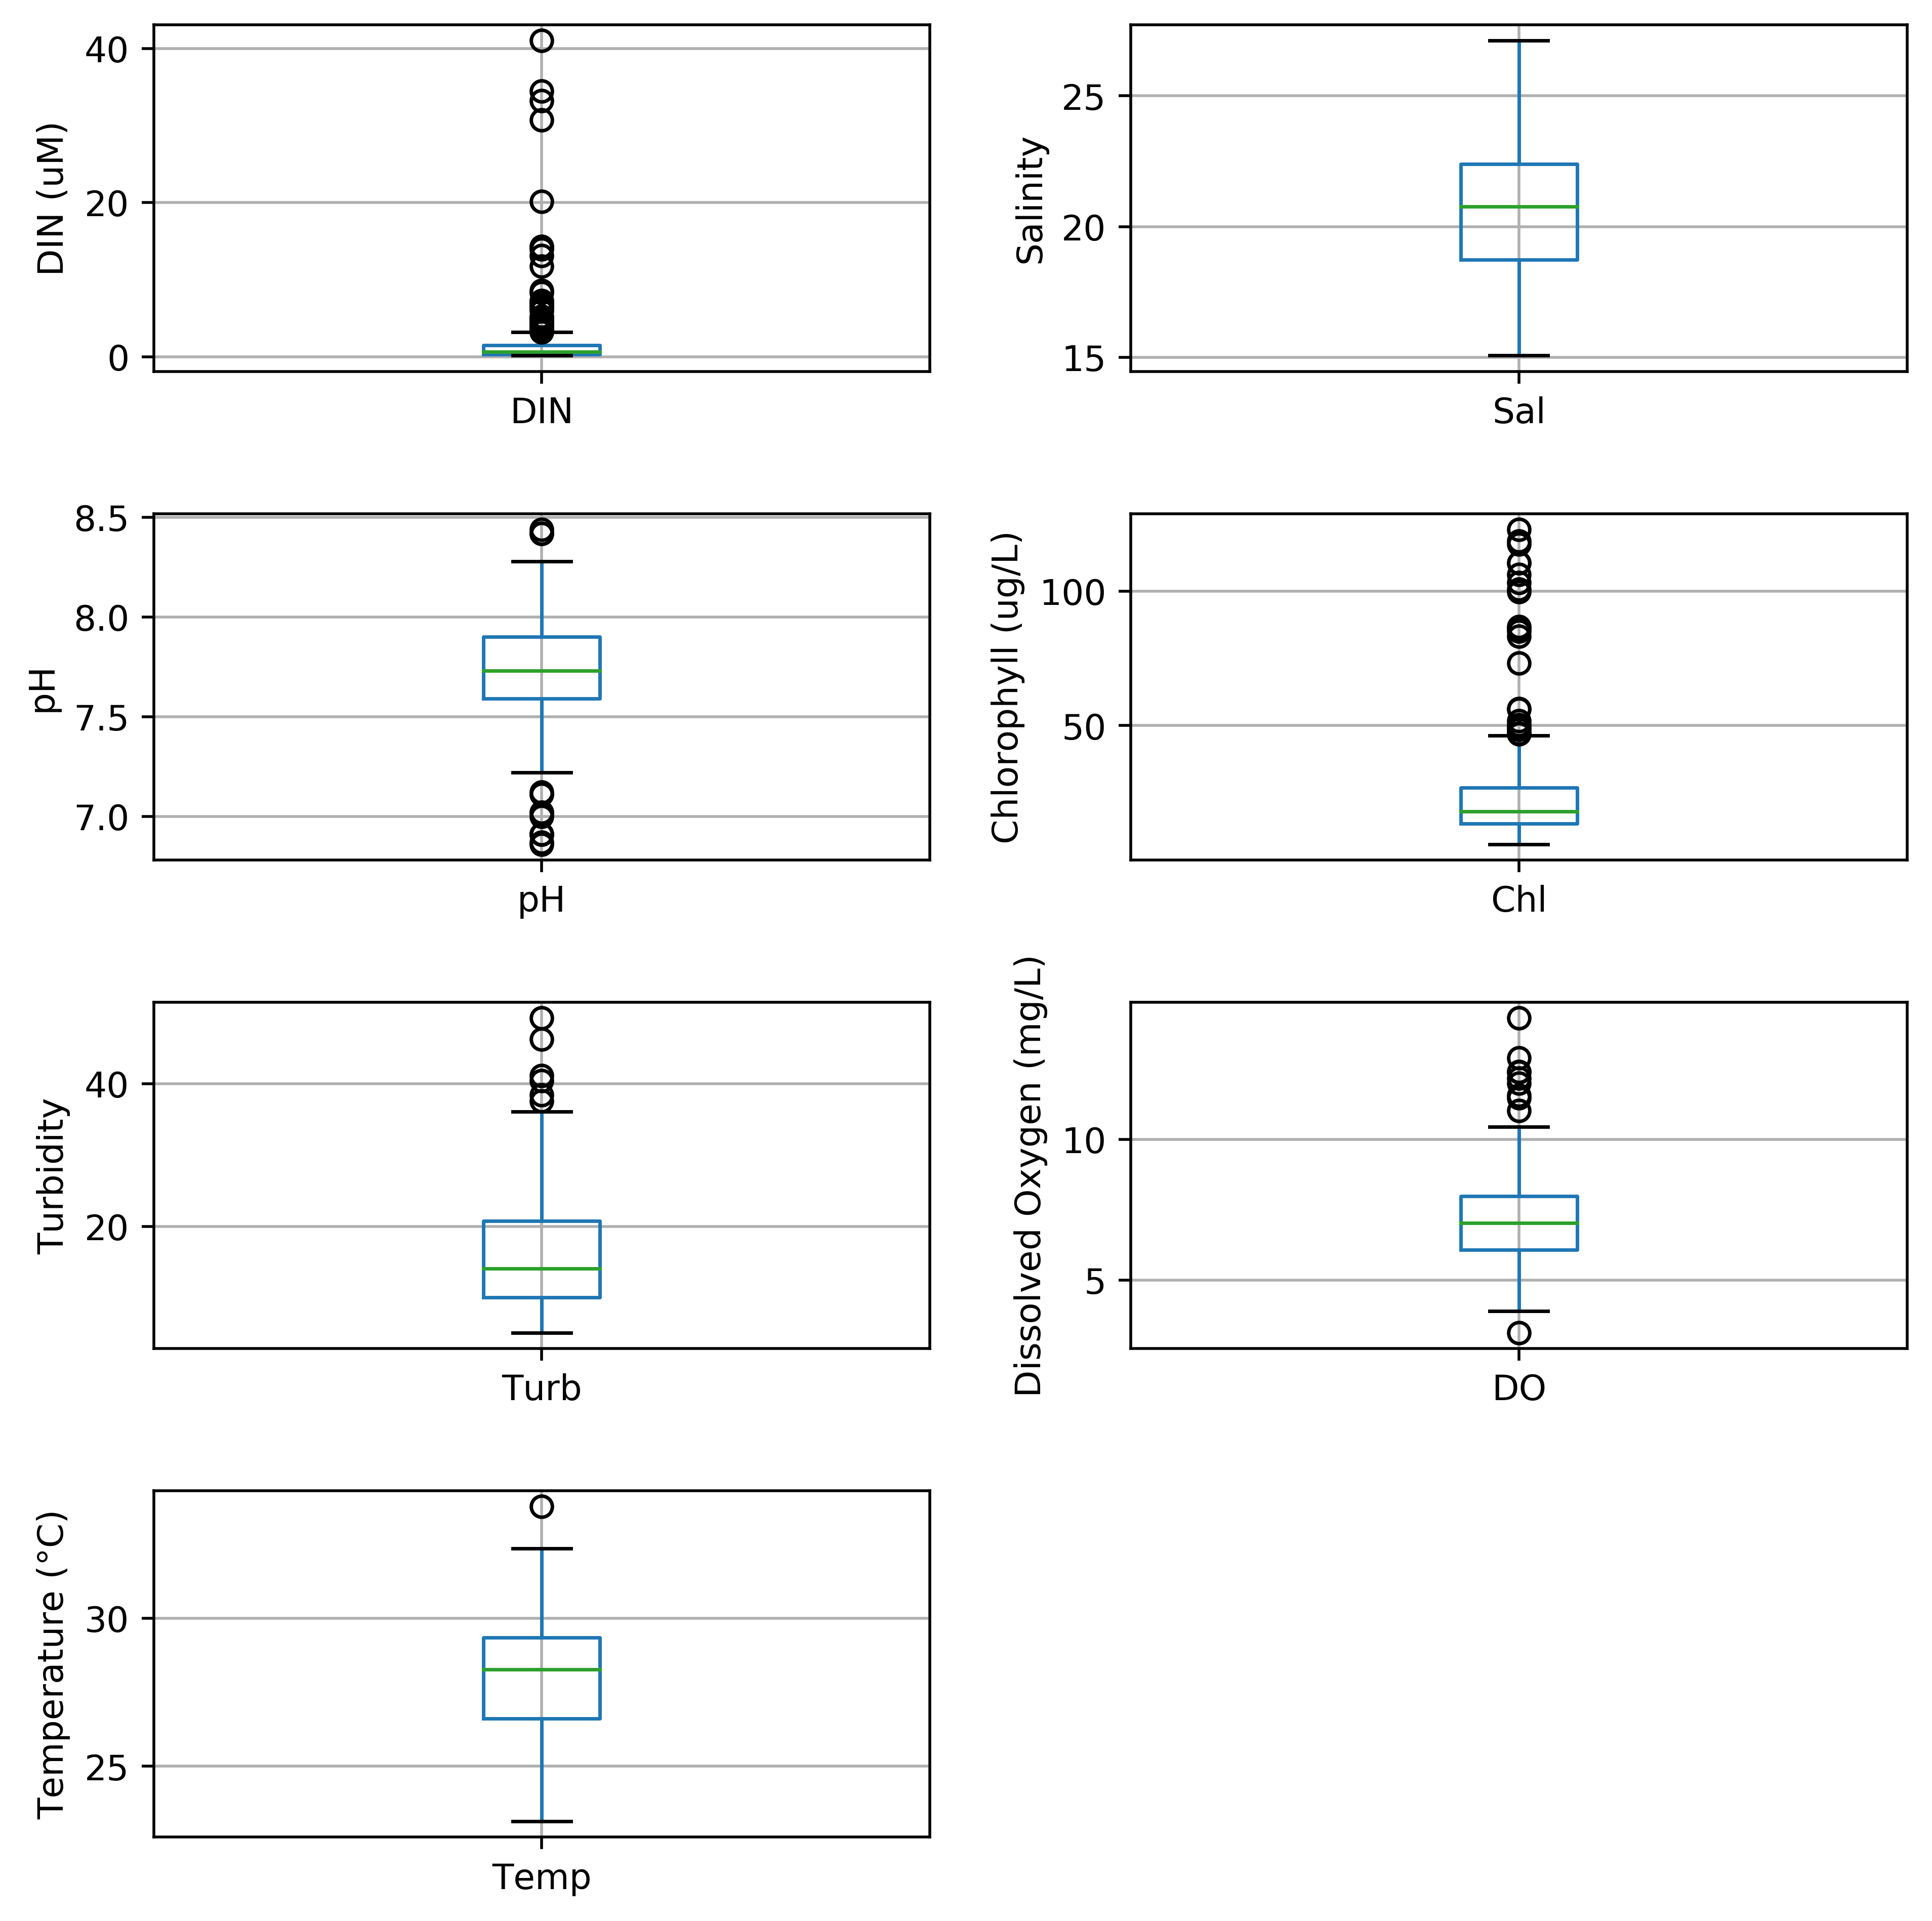

In [34]:
fig, axs = plt.subplots(4, 2, figsize = (8, 8), dpi = 500)
fig.tight_layout(pad=2.0) #This increases the spacing between subplots!

axs[0, 0] = used_data.boxplot('DIN', ax=axs[0,0]) #DIN
axs[0, 0].set_ylabel('DIN (uM)')

axs[0, 1] = used_data.boxplot('Sal', ax=axs[0,1]) #Salinity
axs[0, 1].set_ylabel('Salinity')

axs[1, 0] = used_data.boxplot('pH', ax=axs[1,0]) #pH 
axs[1, 0].set_ylabel('pH')

axs[1, 1] = used_data.boxplot('Chl', ax=axs[1,1]) #Chlorophyll
axs[1, 1].set_ylabel('Chlorophyll (ug/L)')

axs[2, 0] = used_data.boxplot('Turb', ax=axs[2,0]) #Turbidity
axs[2, 0].set_ylabel('Turbidity')

axs[2, 1] = used_data.boxplot('DO', ax=axs[2,1]) #Dissolved Oxygen
axs[2, 1].set_ylabel('Dissolved Oxygen (mg/L)')

axs[3, 0] = used_data.boxplot('Temp', ax=axs[3,0]) #Temperature
axs[3, 0].set_ylabel('Temperature (\N{DEGREE SIGN}C)')

fig.delaxes(axs[3,1]) # remove empty subplot

Referencing the historgam plots and boxplots above, we still see the similar distributions that were noticed previously with the corrected data above, however, there are many fewer outliers now that the data has been reduced to be more specific in terms of time and depth. Once again, the outliers that remain, we have no reason to get rid of.

The data from all of the data sources in this project overlap in terms of yearly and seasonal coverage. Some data is, however, presented as daily averages (wind speed, wind direction, and precipitation), while others are presented as a single timepoint from an hour in the day (YSI data, nitrogen, and tides). Overall, all field collected samples are overlaped with data collected from the outside sources on the same day of sample collection.

Overall, I plan to use data from D1 and D3 from June through September as the dataset for my model. I will likely use a combination of chlorophyll, dissolved oxygen, and wind direction as my variables, likely also adding in salinity and temperature to see if it helps make the model more robust.